# Data Wrangling

# Project Overview
<em>State the high-level overview of the project, including the background information such as problem domain, project origin, and related data sets or input data.</em>


As young professional living in metropolitan like Shanghai, housing cost could take a large part of monthly income, usually 1/3 or 1/4. Finding a rental apartment which is of good size, location, close to metro, easy commute to office , and for a good value of money can be a daunting task for many.  

I would like to do some research on Shanghai's rental apartment market to prepare myself for finding next apartment, and also find some interesting insights to share to others who may be interested. Research range such as which subarea is the good value of money, which area offers more houses, what should be a reasonable price given its location, number of rooms, etc. I hope next time when I'm visiting houses I can roughly know if the price offered by agent is a reasonable one. 


# Data Preparation 

I crawled the most popular apartment rental and sell website in China https://sh.lianjia.com/. 

The reason why I choose lianjia among others is that the listings in Lianjia are all real information and the data are structured and well filled. A lot of other website contains a lot of fake listings, which will affect the accuracy of analysis.

In the end, after hours of crawling, I got over 30000 rental listings, all stored in `./db/house_rent_lianjia.db`.

# Problem Statement
<em>Define the problem to be solved.</em>

After briefly skimming through the crawled rental listings data, I am able to come up with some concrete questions to be answered below. 

For House Rentals:
1. What is the average rental price per square meter in each district and subarea?
2. How does the price per square meter vary based on the number of bedrooms or bathrooms in the apartment?
3. Is there a correlation between the apartment's proximity to a metro station and its rental price?
4. Which districts and subareas have the highest and lowest rental prices?
5. What is the most common type of apartment layout (number of bedrooms, bathrooms, etc.) in each district and subarea?
6. Are there certain features or amenities (such as parking or an elevator) that tend to be associated with higher rental prices?
7. How do apartment prices vary based on the floor the apartment is on (higher or lower floors)?
8. Which apartment complexes or buildings have the highest and lowest rental prices per square meter?
9. If I'm looking to rent a place that less than 100 RMB per square meters , and within 3km to the city center, also close to metro stations (within 1km), which subareas should I look into ?
    
Models 
1. Can we build a model to predict the rental price of an apartment given its features, such as coordinate, size, number of rooms, etc.?
2. Can we use clustering algorithms to group apartments based on their features, such as location, size, etc., and identify any patterns or trends in the data?
3. Can we use decision tree algorithms to identify the most important features that contribute to the rental price of an apartment?
4. Can we use neural networks to predict the rental price of an apartment given its features, and compare the performance of this model with other machine learning models?
5. Can we use dimensionality reduction techniques, such as principal component analysis (PCA), to reduce the number of features in the data while preserving as much information as possible?
6. Can we use anomaly detection algorithms to identify apartments that have unusually high or low rental prices, and investigate the reasons for these anomalies?
7. Can we use association rule mining to identify any interesting relationships or associations between the different features in the data?
8.  Can we use reinforcement learning algorithms to optimize the rental price of an apartment given its features and other external factors, such as demand, seasonality, etc.?


# Metrics 
<em> define the metrics to measure the results and justifications to use the metrics. For example, if you use time-series data sets, what metrics will be appropriate to measure the results.</em>

I'm working with a regression problem - predicting rental prices, I choose to use MSE, RMSE and MAE to evaluate performance of model. 

Mean Squared Error (MSE):  This is the average of the square of the errors. The advantage of this metric is that it penalizes large errors more than small ones, due to squaring. This makes it very useful when large errors are particularly undesirable.

Root Mean Squared Error (RMSE): This is the square root of MSE. The advantage of RMSE over MSE is that it is in the same units as the target variable, making it easier to interpret. It also penalizes large errors, as MSE does.

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted and actual values. It's less sensitive to outliers compared to MSE and RMSE. If there are many outliers in your data, and you don't want your model to be overly influenced by them, you may prefer this metric.

#  Data Exploration  
<em>describe the data sets, including the features, data distributions, and descriptive statistics. Identify any abnormalities or specific characteristics inherent in the data sets.</em>



# Data visualization 
<em>build data visualization based on the data exploration in the previous step.</em>

# Data Preprocessing
<em>describe the steps taken to preprocess the data and address any abnormalities in the data sets. If data preprocessing is not needed, please explain why.</em>

# Implementation
discuss the process using the models, algorithms, and techniques applied to solve the problem. Any complications during the implementation should be mentioned.

# Refinement
describe the process to refine the algorithms and techniques, such as using cross-validation or changing the parameter settings.

# Model Evaluation and Validation

discuss the models and parameters used in the methodology. If no model is used, students can discuss the methodology using data visualizations and other means.

# Justification: 
discuss the final results in detail and explain why some models, parameters, or techniques perform better over others. Show and compare the results in tabular forms or charts.

# Reflection: 
summarize the end-to-end problem solution and discuss one or two particular aspects that you find interesting or difficult to implement.

# Improvement: 
provide suggestions for the next research to improve the experiment.


===================================

#  Data Exploration & Data propcessing
<em> describe the data sets, including the features, data distributions, and descriptive statistics. Identify any abnormalities or specific characteristics inherent in the data sets.  
describe the steps taken to preprocess the data and address any abnormalities in the data sets. If data preprocessing is not needed, please explain why.</em>



In [1]:
import sqlite3
import pandas as pd
import numpy as np

# Connect to the database
conn = sqlite3.connect('./db/house_rent_lianjia.db')

# Create a cursor object
c = conn.cursor()

# Query the database and fetch all the data from a table
c.execute("SELECT * FROM sh_home_rentdata_unique_final")
rows = c.fetchall()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in c.description])

# Close the cursor and the connection
c.close()
conn.close()

# Have an overview of the data
df


,link,house_code,district,subarea,compound_name,title,price,lease_mode,type_area,orient_floor,...,house_visit,house_tags,facilities,house_desc,room_count,hall_count,toilet_count,area_sqm,decoration,price_float
0,http://sh.lianjia.com/zufang/SH174097200193103...,SH1740972001931034624,静安,彭浦,临汾路1564弄,整租·临汾路1564弄 1室0厅 南,3700,整租,1室0厅1卫 34.97㎡,南 低楼层/6层,...,需提前预约,"必看好房,官方核验,新上","洗衣机,空调,电视,床",None,1,0,1,34.97,,3700.0
1,http://sh.lianjia.com/zufang/SH173449114059957...,SH1734491140599578624,静安,彭浦,共康四村,整租·共康四村 2室1厅 南,4200,整租,2室1厅1卫 63.22㎡,南 高楼层/6层,...,需提前预约,"必看好房,官方核验",None,None,2,1,1,63.22,,4200.0
2,http://sh.lianjia.com/zufang/SH173271550902507...,SH1732715509025079296,静安,大宁,粤秀苑,整租·粤秀苑 2室1厅 南,6200,整租,2室1厅1卫 70.31㎡ 精装修,南 中楼层/6层,...,一般下班后可看,"必看好房,官方核验,精装,随时看房","洗衣机,空调,电视,床",None,2,1,1,70.31,精装修,6200.0
3,http://sh.lianjia.com/zufang/SH170003577277985...,SH1700035772779855872,静安,南京西路,静安紫苑,整租·静安紫苑 1室0厅 东南,7000,整租,1室0厅1卫 43.00㎡ 精装修,东南 中楼层/27层,...,需提前预约,"必看好房,官方核验,近地铁,精装,随时看房","洗衣机,空调,电视,床",None,1,0,1,43.00,精装修,7000.0
4,http://sh.lianjia.com/zufang/SH174027235982416...,SH1740272359824162816,静安,彭浦,星保花苑,整租·星保花苑 2室1厅 南,5200,整租,2室1厅1卫 75.36㎡,南 中楼层/13层,...,需提前预约,"必看好房,官方核验,业主自荐,新上","洗衣机,空调,电视,热水器,床",None,2,1,1,75.36,,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,http://sh.lianjia.com/zufang/SH289693882260652...,SH2896938822606520320,浦东,张江,中建朗阅府,整租·中建朗阅府 4室2厅 南,31000,整租,4室2厅3卫 173.62㎡,南 中楼层/4层,...,需提前预约,动迁安置房,None,【交通出行】\n出门公交961路，孙桥1路，990路，13号地铁线张江路地铁站，华夏高架\n...,4,2,3,173.62,,31000.0
31067,http://sh.lianjia.com/zufang/SH289933818567694...,SH2899338185676947456,浦东,梅园,滨江茗园,整租·滨江茗园 5室2厅 南/北,45000,整租,5室2厅3卫 288.06㎡ 精装修,南/北 高楼层/23层,...,需提前预约,"官方核验,近地铁,精装","洗衣机,空调,衣柜,冰箱,热水器,床,天然气",【房源亮点】\n该房之前是业主自住的，中间楼层，采光充足，整体保养的很好的。\n\n【户型介...,5,2,3,288.06,精装修,45000.0
31068,http://sh.lianjia.com/zufang/SH290133274611706...,SH2901332746117062656,浦东,南码头,天健浦荟大楼,整租·天健浦荟大楼 3室2厅 南,8500,整租,3室2厅2卫 40.00㎡ 精装修,南 中楼层/10层,...,需提前预约,"近地铁,精装,双卫生间,非居住房屋","洗衣机,空调,衣柜,冰箱,热水器,床,天然气",【房源亮点】\n精装修，楼内有健身房，咖啡厅等，小区环境好，装备齐全，出行方便。\n\n【户...,3,2,2,40.00,精装修,8500.0
31069,http://sh.lianjia.com/zufang/SH290224638814454...,SH2902246388144545792,浦东,周浦,中金海棠湾(三期),整租·中金海棠湾(三期) 5室2厅 南,9000,整租,5室2厅2卫 145.00㎡ 精装修,南 中楼层/7层,...,需提前预约,"精装,双卫生间,动迁安置房",床,【交通出行】\n992/451/975公交，1117直达周浦东地铁站，开车距离3公里左右就可...,5,2,2,145.00,精装修,9000.0


Now we see here are 31071 rows × 34 columns house rent data
Let's first do some data preprocessing, we will:
1. Look at one sample row data
2. check data types of entire dataframe
3. pick out the columns that contains interested data
   1.  remove the ones that don't contain useful information or contains duplicated information
   2.  convert columns into correct types that suits data analysis
   3.  split content of a column into multiple meaningful columns if necessary 

In [2]:
# Check one sample row data 
df.iloc[0]

link                  http://sh.lianjia.com/zufang/SH174097200193103...
house_code                                        SH1740972001931034624
district                                                             静安
subarea                                                              彭浦
compound_name                                                  临汾路1564弄
title                                                整租·临汾路1564弄 1室0厅 南
price                                                              3700
lease_mode                                                           整租
type_area                                                 1室0厅1卫 34.97㎡
orient_floor                                                   南 低楼层/6层
last_maintain_time                                           2023-02-26
coordinate                                         121.443648,31.316712
metro                                                              None
area                                                            

In [3]:
# Inspect data types of the dataframe
df.dtypes

link                   object
house_code             object
district               object
subarea                object
compound_name          object
title                  object
price                  object
lease_mode             object
type_area              object
orient_floor           object
last_maintain_time     object
coordinate             object
metro                  object
area                   object
orientation            object
check_in               object
floor                  object
has_elevator           object
has_parking            object
water_type             object
electricity_type       object
gas                    object
heating                object
lease_period           object
house_visit            object
house_tags             object
facilities             object
house_desc             object
room_count             object
hall_count              int64
toilet_count            int64
area_sqm              float64
decoration             object
price_floa

After carefully look into the columns and data types, I find out that:
1. some columns need to be removed as it is not useful for rent price analysis or it contains info other columns has already contained, these columns are:
   1. `title`, is simply a combined string of `lease_mode`+`compound_name`+`type_area` + `orientation` 
   2. `price`, is duplicated with `price_float`
   3. `lease_mode`, the entire column has just one value '整租'
   4. `orient_floor`, is duplicated with `orientation` and `floor`
   5. `last_maintain_time`,`check_in`,`lease_period`,`house_visit`
   6. `area`, is duplicated with `area_sqm`
2. some columns need to be split in to multiple columns to separate info into meaningful chunks
   1. `type_area`, sample data`1室0厅1卫 34.97㎡`, only store the `type`
   2. `floor`, sample data`低楼层/6层`, split and use 2 columns to store the data
3. data types of some columns should be changed:
   1. `room_count`, change from `object` to `int64`
   2. `decoration`, replace empty string with NaN

In [4]:
# remove title as title = lease mode + compound_name+type+ orientation. 
df.drop(columns='title',inplace=True,errors='ignore') 
# remove price as price float contains converted data 
df.drop(columns='price',inplace=True,errors='ignore')
# remove lease_mode as the entire column has just one value '整租'
df.drop(columns='lease_mode',inplace=True,errors='ignore')
# remove orient_floor as orientation and floor has the info
df.drop(columns='orient_floor',inplace=True,errors='ignore')

# remove last_maintain_time
df.drop(columns='last_maintain_time',inplace=True,errors='ignore')
# remove check_in 
df.drop(columns='check_in',inplace=True,errors='ignore')
# remove lease_period
df.drop(columns='lease_period',inplace=True,errors='ignore')
# remove house_visit
df.drop(columns='house_visit',inplace=True,errors='ignore')
# remove area 
df.drop(columns='area',inplace=True,errors='ignore')

# convert type_area to type 
df['layout'] = df.type_area.str.split(' ').str[0] if 'type_area' in df.columns else df['layout']
df.drop(columns='type_area',inplace=True,errors='ignore')
# split floor into 2 columns 
df[['floor_sec','floor_num']] = df.floor.str.split('/',expand=True) if 'floor' in df.columns else df[['floor_sec','floor_num']]
df.drop(columns='floor',inplace=True,errors='ignore')

# fill decoration in others as null 
df['decoration']=df.decoration.replace('',np.nan)
df['room_count'] = pd.to_numeric(df['room_count'], errors='coerce')

df.isnull().sum()

link                    0
house_code              0
district                0
subarea                 0
compound_name           0
coordinate              1
metro                9819
orientation             0
has_elevator            0
has_parking             0
water_type              0
electricity_type        0
gas                     0
heating                 0
house_tags              1
facilities           8938
house_desc          22591
room_count              1
hall_count              0
toilet_count            0
area_sqm                0
decoration           9767
price_float             0
layout                  0
floor_sec               0
floor_num               0
dtype: int64

Now let's deal with missing values.   

From above output result, we can see there are some uncommon null values from `coordinate`, `house_tags` and `room_count`, we may want to inspect and handle these outliers.
It is normal to have null values in `metro`, `facilities`, `house_description` and `decoration`. 

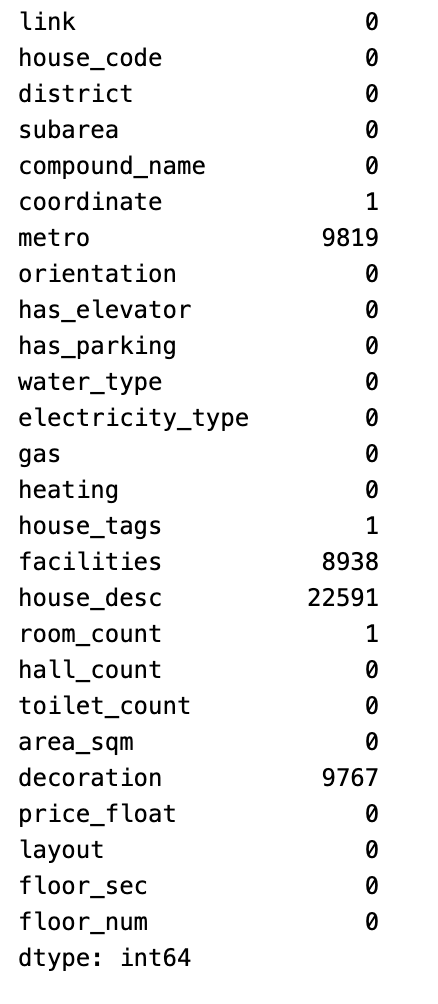

In [5]:
# Filter the rows where either `coordinate` or `house_tags` is null
mask = df['coordinate'].isnull() | df['house_tags'].isnull()| df['room_count'].isnull()

# Select the rows that satisfy the above condition
result = df[mask]

# Print the resulting houses that contains null values
result

,link,house_code,district,subarea,compound_name,coordinate,metro,orientation,has_elevator,has_parking,...,house_desc,room_count,hall_count,toilet_count,area_sqm,decoration,price_float,layout,floor_sec,floor_num
20299,http://sh.lianjia.com/zufang/SH287378853271438...,SH2873788532714389504,松江,松江新城,福都广场锋尚99,"121.25584,31.040236",None,南,有,租用车位,...,None,2.0,1,1,40.00,NaN,2800.0,2室1厅1卫,中楼层,13层
22807,http://sh.lianjia.com/zufang/SH164857066072257...,SH1648570660722573312,青浦,徐泾,虹桥世界中心,"121.310493,31.191102","['2号线 ', ' 徐泾东', '311m'],['17号线 ', ' 诸光路', '10...",南,有,租用车位,...,None,NaN,2,0,75.73,NaN,5900.0,未知室2厅0卫,低楼层,10层
27168,http://sh.lianjia.com/zufang/SH173226235378689...,SH1732262353786896384,普陀,武宁,中山北路3904弄,None,None,南,无,暂无数据,...,None,1.0,1,1,45.56,精装修,4300.0,1室1厅1卫,高楼层,7层


I want to go to the link and check why above 3 houses has null values is common columns
After investigation :
1. House 20299 is invalid, I will delete this row. 
2. House 22807 is invalid,, I will delete this row
3. House 27168 is valid, but I have no idea why coordinate info is missing for this house. As the house of same compound share the same coordinate, I will fill the missing coordinate value
   of this row by copy the coordinate value of same compound '中山北路3904弄'

In [6]:
# Delete the house code SH2873788532714389504 and SH1648570660722573312
# create a list of indices of the rows to be deleted
indices = df[(df['house_code'] == 'SH2873788532714389504') | (df['house_code'] == 'SH1648570660722573312')].index
# delete the rows with the specified indices
df.drop(indices, inplace=True)

# Fill the coordinate of house SH1732262353786896384 with the coordinate of other houses of the same compound

# find the row with missing value in 'coordinate'
missing_row = df.loc[df['coordinate'].isna()]

# fill missing value in 'coordinate' based on values in other rows with the same 'compound name'
fill_value = df.loc[df['compound_name'] == missing_row['compound_name'].iloc[0], 'coordinate'].dropna().iloc[0]
missing_row['coordinate'] = fill_value

# update the DataFrame with the filled value
df.update(missing_row)


/var/folders/88/vr6t1yr91fzgflwqw8v24px00000gn/T/ipykernel_654/1618345292.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_row['coordinate'] = fill_value


In [7]:
# Check the df info again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31069 entries, 0 to 31070
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              31069 non-null  object 
 1   house_code        31069 non-null  object 
 2   district          31069 non-null  object 
 3   subarea           31069 non-null  object 
 4   compound_name     31069 non-null  object 
 5   coordinate        31069 non-null  object 
 6   metro             21251 non-null  object 
 7   orientation       31069 non-null  object 
 8   has_elevator      31069 non-null  object 
 9   has_parking       31069 non-null  object 
 10  water_type        31069 non-null  object 
 11  electricity_type  31069 non-null  object 
 12  gas               31069 non-null  object 
 13  heating           31069 non-null  object 
 14  house_tags        31069 non-null  object 
 15  facilities        22132 non-null  object 
 16  house_desc        8480 non-null   object 
 17

Below some other string type columns that contains value that can be converted into numerical parameters, I will convert them and then delete original string type columns

In [8]:
import pandas as pd
import numpy as np

# define function to count metro stations
def count_metro_stations(row):
    if pd.isnull(row['metro']):
        return 0
    else:
        return len(eval(row['metro']))

# Define a function to count the number of facilities
def count_facilities(facilities):
    if pd.isnull(facilities):
        return 0
    else:
        return len(facilities.split(','))

if 'num_metro_stations' not in df.columns:
    # create new column to store number of metros nearby, it is derived from metro column.
    df['num_metro_stations'] = df.apply(lambda row: count_metro_stations(row), axis=1)
    # replace any NaN values with 0
    df['num_metro_stations'] = df['num_metro_stations'].fillna(0).astype(np.int64)

if 'room_count' in df.columns:
    # Convert the room counts to integer
    df['room_count'] = df['room_count'].astype(int)
if 'hall_count' in df.columns:
    df['hall_count'] = df['hall_count'].astype(int)
if 'toilet_count' in df.columns:
    df['toilet_count'] = df['toilet_count'].astype(int)

if 'floor_num_int' not in df.columns:
    # Create a new column to store digit part of floor_num string
    df['floor_num_int'] = df['floor_num'].str.extract('(\d+)', expand=False).astype(int, errors='ignore')
    # Drop the original 'floor_num' column if it exists
    df.drop('floor_num', axis=1, inplace=True, errors='ignore')

if 'longitude' not in df.columns:
    # create new columns to store for longitude and latitude value separately , as float 
    df['longitude'] = df['coordinate'].str.split(',').str[0].astype(float)
if 'latitude' not in df.columns:
    df['latitude'] = df['coordinate'].str.split(',').str[1].astype(float)
    df.drop('coordinate', axis=1, inplace=True)

if 'facilities_count' not in df.columns:
    # Apply the function to the "facilities" column and create a new column "facilities_count"
    df['facilities_count'] = df['facilities'].apply(count_facilities)

if 'price_per_sqm' not in df.columns:
    # create a new column to store rental price per square meters 
    df['price_per_sqm'] = df['price_float'] / df['area_sqm']


In [9]:
# check again to see a sample row data
df.iloc[0]

link                  http://sh.lianjia.com/zufang/SH174097200193103...
house_code                                        SH1740972001931034624
district                                                             静安
subarea                                                              彭浦
compound_name                                                  临汾路1564弄
metro                                                              None
orientation                                                           南
has_elevator                                                          无
has_parking                                                        暂无数据
water_type                                                           民水
electricity_type                                                     民电
gas                                                                   有
heating                                                             自采暖
house_tags                                                 必看好房,

I also notice that, there's some some house are tagged with '非居住', which mean non- residential, it could be office or commercial use. As the price for such rental are very different from residential apartment, which the type of apartment we are interested to analyses. So we will split the df into residential and non residential rental listings and perform the analysis on the residential part. 

In [10]:

# assuming your DataFrame is named `df`
non_residential = df[df['house_tags'].str.contains('非居住')]
residential = df[~df['house_tags'].str.contains('非居住')]

In [11]:
num_non_residential = len(non_residential)
percent_non_residential = num_non_residential / len(df) * 100
print(num_non_residential, percent_non_residential)

num_residential = len(residential)
percent_residential = num_residential / len(df) * 100
print(num_residential,percent_residential)

2049 6.594998229746693
29020 93.4050017702533


Now we can see that we are left with 29020 (93.4%) residential rental listings to deal with. The rest of 2049 (6.5%) are non-residential listings that will leave out.

In previous steps we removed and corrected some columns and values, next we can 
1. perform one-hot encoding on selected categorical variable 
2. check if there's numerical outliers, remove them if neccessary  

In [12]:
# recall column names
residential.columns

Index(['link', 'house_code', 'district', 'subarea', 'compound_name', 'metro',
       'orientation', 'has_elevator', 'has_parking', 'water_type',
       'electricity_type', 'gas', 'heating', 'house_tags', 'facilities',
       'house_desc', 'room_count', 'hall_count', 'toilet_count', 'area_sqm',
       'decoration', 'price_float', 'layout', 'floor_sec',
       'num_metro_stations', 'floor_num_int', 'longitude', 'latitude',
       'facilities_count', 'price_per_sqm'],
      dtype='object')

Plot all categorical variables in pie charts:


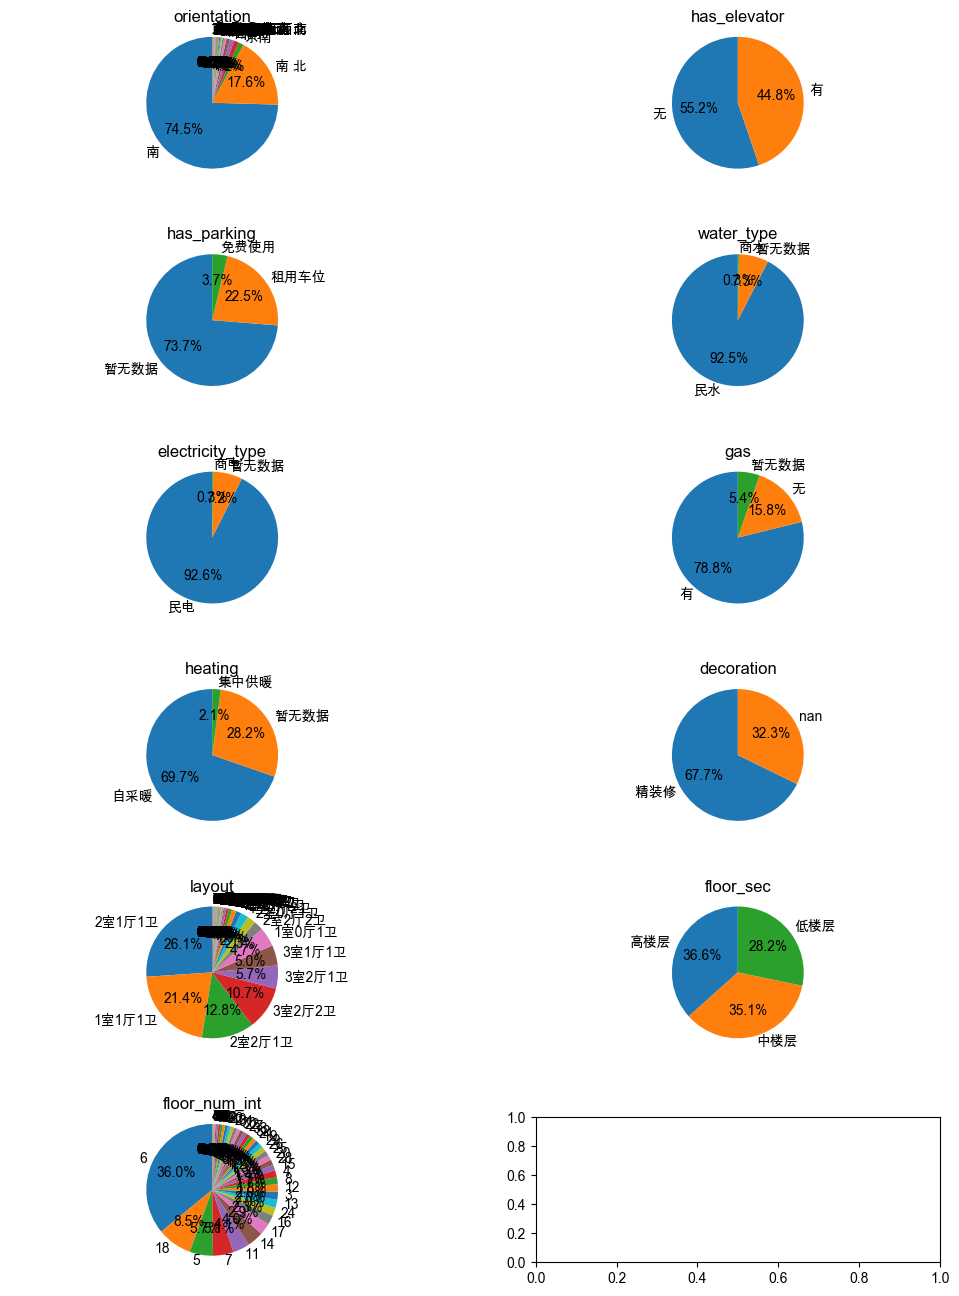

In [13]:

import matplotlib.pyplot as plt

# To plot Chinese characters correctly
plt.rcParams['font.family'] = 'Arial Unicode MS'

selected_cat_columns=['orientation', 'has_elevator', 'has_parking',
       'water_type', 'electricity_type', 'gas', 'heating', 'decoration','layout','floor_sec','floor_num_int']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(selected_cat_columns) + n_cols - 1) // n_cols

# Create the subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 16))

# Flatten the axs array for easier indexing
axs = axs.ravel()

# Loop through each column
for i, col in enumerate(residential[selected_cat_columns]):
    # Get value counts for column
    counts = residential[col].value_counts(dropna=False)

    # Plot pie chart
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[i])
    axs[i].axis('equal')
    axs[i].set_title(col)

    # Hide the y-axis labels
    axs[i].set_ylabel('')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Display the plots
plt.show()


The pie chart on each categorical variable above helps me identify which categorical variable can be one-hot encoded, and which one are not: 

- Categorical variables that has too many unique values 
  -  it may not be practical to create a separate binary variable for each unique value, as this would result in too many features and potentially overfitting the model
  -  such as : `orientation`, `layout`, `floor_num_int`
- Categorical variables that has fair amount of missing values:
  - Questionable for one-hot encoding but depends on the questions. I'm filling confortable filling the imput the missing values, it's better to keep the missing values as a separate category. Let's save this for later 
  - `has_parking`,`water_type`,`electricity_type`,`gas`,`heating` 
- Categorical variables that suits for one-hot encoding :
  - `has_elevator`, `decoration`,`floor_dec`

Next, let's look at if we have any numerical outliers that may affect our analysis:

In [14]:
residential.describe()

,room_count,hall_count,toilet_count,area_sqm,price_float,num_metro_stations,floor_num_int,longitude,latitude,facilities_count,price_per_sqm
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,2.077739,1.318573,1.245107,83.611848,8388.310200,2.023639,12.260476,121.442611,31.213283,4.119159,104.338291
std,0.897800,0.616122,0.558496,50.911827,8152.944782,1.618897,8.557950,0.117073,0.095975,3.228557,49.667191
min,1.000000,0.000000,0.000000,6.300000,700.000000,0.000000,1.000000,120.930790,30.718873,0.000000,6.796117
25%,1.000000,1.000000,1.000000,51.000000,4800.000000,0.000000,6.000000,121.391803,31.163857,0.000000,70.163562
50%,2.000000,1.000000,1.000000,75.050000,6200.000000,2.000000,7.000000,121.450384,31.221156,4.000000,96.595428
75%,3.000000,2.000000,1.000000,99.000000,8800.000000,3.000000,18.000000,121.511894,31.276094,7.000000,129.166980
max,9.000000,5.000000,9.000000,789.190000,240000.000000,17.000000,78.000000,121.939316,31.662014,10.000000,707.964602


First I try to use the 1.5 *IQR rule to find the outliers in numerical variables: 

In [15]:
# trynna see number of outliers in area, and price . consider if i should delete it or not 

q1 = residential[['area_sqm','price_float']].quantile(0.25)
q3 = residential[['area_sqm','price_float']].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower bounds for outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# identify the outliers in each column
outliers = pd.DataFrame()
for col in residential[['area_sqm','price_float']].columns:
    outliers[col] = (residential[col] < lower_bound[col]) | (residential[col] > upper_bound[col])

# print the outliers
print(outliers.sum())

area_sqm       1185
price_float    2988
dtype: int64


But I find above result is ruling out a lot valid rental data.
I will use another approach

The boxplot is suitable here to identify the numerical outliers, let's draw some:

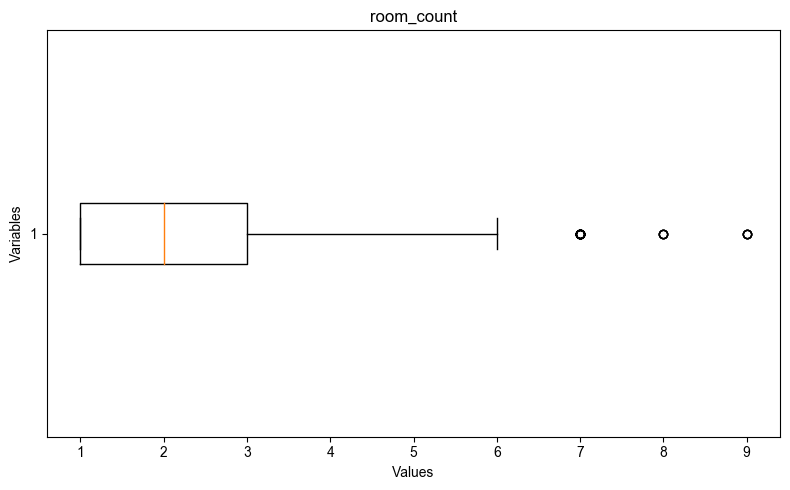

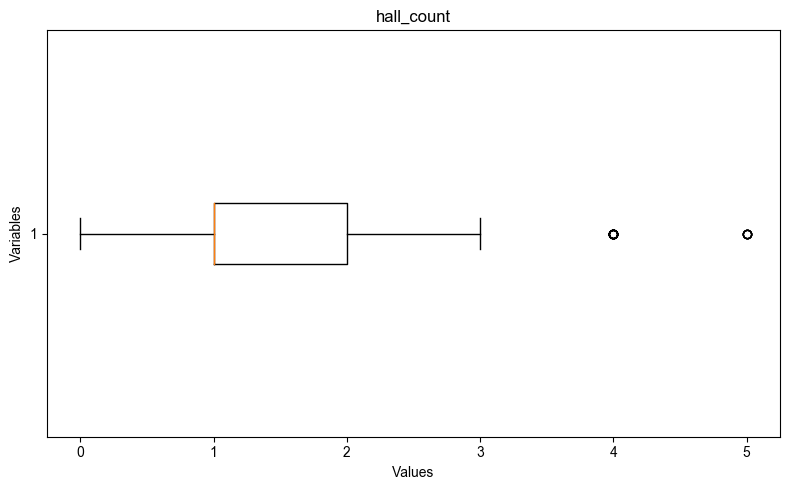

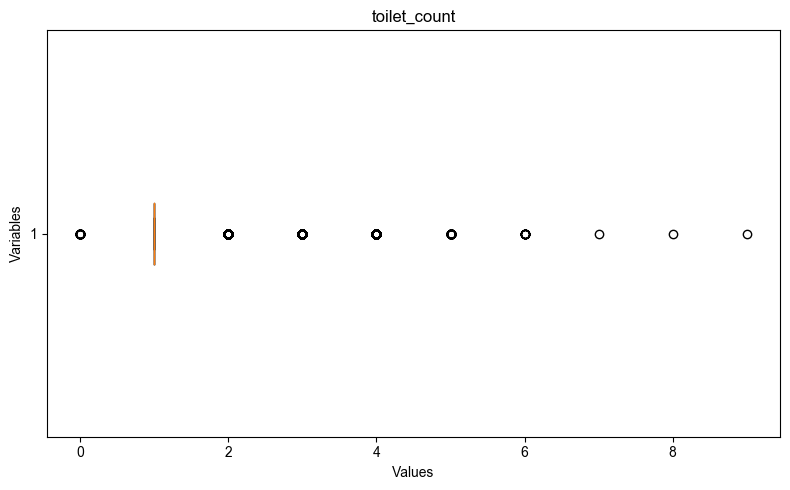

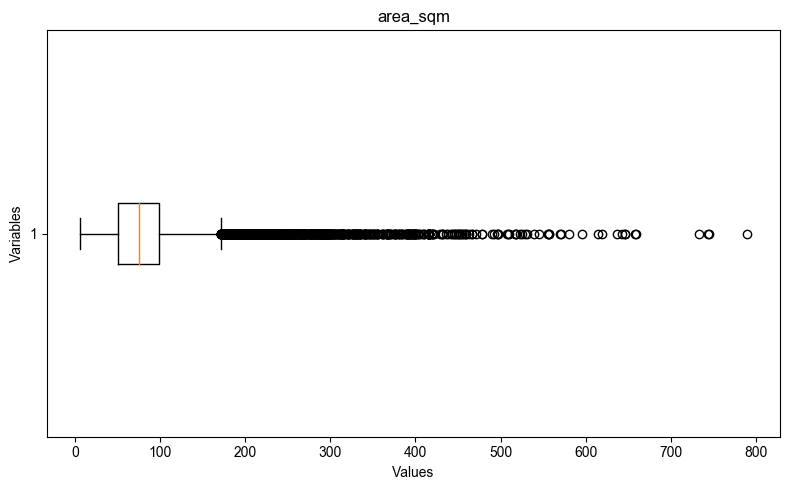

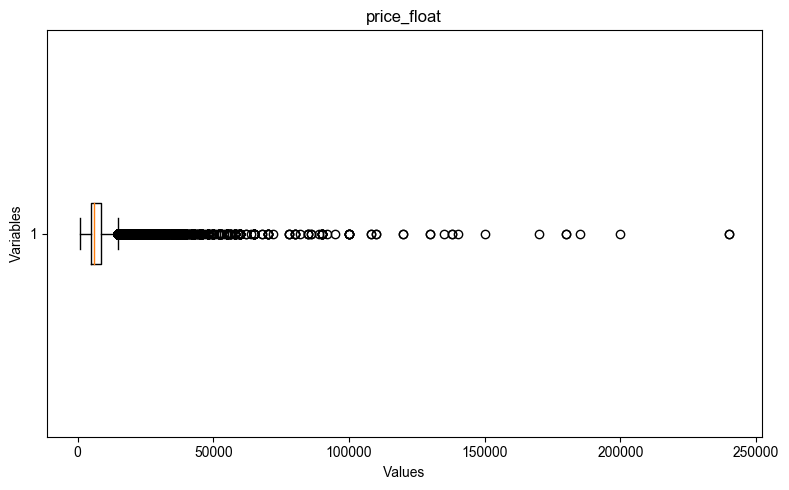

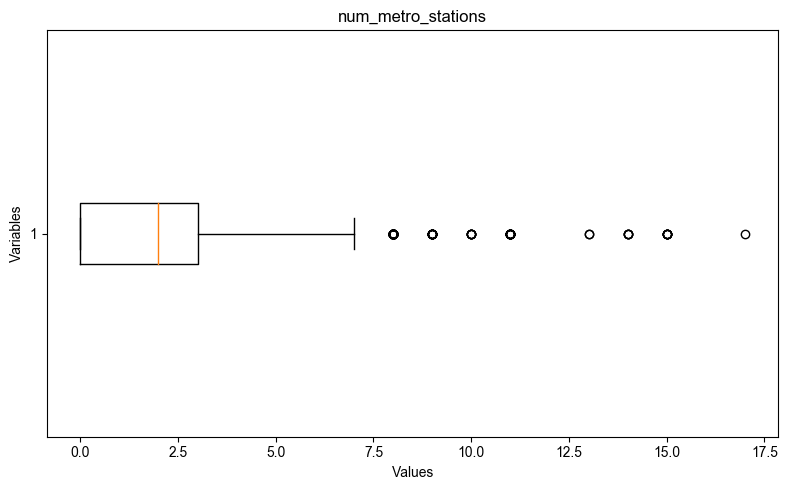

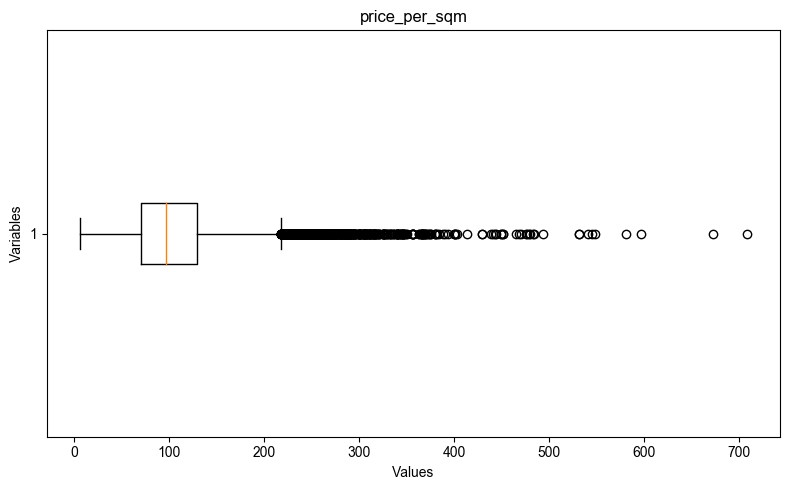

In [16]:
# select numeric columns
numeric_cols = ['room_count', 'hall_count', 'toilet_count', 'area_sqm', 'price_float',                 'num_metro_stations', 'price_per_sqm']

for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.boxplot(residential[col].dropna(), vert=False)
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Variables')

    plt.tight_layout()
    plt.show()


We notice that there is extreme values here in area.
Let's check out these extreme values, we may need to remove these extreme values.


In [17]:
#for house rent, we can say that room_count>6 is rarely and unlikely.
residential[residential['room_count'] >6]

,link,house_code,district,subarea,compound_name,metro,orientation,has_elevator,has_parking,water_type,...,decoration,price_float,layout,floor_sec,num_metro_stations,floor_num_int,longitude,latitude,facilities_count,price_per_sqm
2789,http://sh.lianjia.com/zufang/SH166780024524269...,SH1667800245242691584,徐汇,植物园,石龙小区,"['3号线 ', ' 石龙路', '449m']",南,无,租用车位,暂无数据,...,精装修,38000.0,9室2厅3卫,低楼层,3,3,121.451545,31.163774,5,200.739567
10251,http://sh.lianjia.com/zufang/SH172399442264902...,SH1723994422649028608,浦东,塘桥,蓝村大厦,"['4号线,6号线 ', ' 蓝村路', '18m'],['4号线,6号线 ', ' 浦电路...",南,有,暂无数据,民水,...,NaN,14500.0,9室0厅1卫,高楼层,3,28,121.534363,31.217291,1,97.814355
11546,http://sh.lianjia.com/zufang/SH169288642037022...,SH1692886420370227200,宝山,杨行,万业紫辰苑,None,南,有,暂无数据,民水,...,NaN,7500.0,7室1厅2卫,低楼层,0,21,121.442506,31.405518,2,46.801872
15187,http://sh.lianjia.com/zufang/SH160470051687130...,SH1604700516871307264,杨浦,新江湾城,建德国际公寓,None,南,有,免费使用,民水,...,精装修,32000.0,7室3厅4卫,高楼层,0,12,121.532875,31.340577,10,131.937000
15471,http://sh.lianjia.com/zufang/SH160034798180080...,SH1600347981800800256,杨浦,新江湾城,银亿领墅,"['18号线 ', ' 殷高路', '600m'],['10号线(新江湾城-虹桥火车站),1...",南,无,免费使用,民水,...,精装修,35000.0,7室2厅5卫,低楼层,4,3,121.504989,31.321216,4,89.743590
19091,http://sh.lianjia.com/zufang/SH173125001215265...,SH1731250012152659968,嘉定,外冈,外冈新苑,None,南,无,暂无数据,民水,...,精装修,14000.0,9室3厅9卫,高楼层,0,6,121.168288,31.371104,7,60.927844
19342,http://sh.lianjia.com/zufang/SH173340128557242...,SH1733401285572427776,崇明,陈家镇,三湘海尚云邸,None,南,无,暂无数据,民水,...,精装修,27000.0,7室3厅6卫,低楼层,0,1,121.840334,31.464170,10,81.887662
19358,http://sh.lianjia.com/zufang/SH166993832830199...,SH1669938328301993984,崇明,陈家镇,览海高尔夫别墅,None,南 北,无,免费使用,民水,...,精装修,32000.0,7室2厅5卫,低楼层,0,3,121.825446,31.468048,10,91.967237
19818,http://sh.lianjia.com/zufang/SH165189628375492...,SH1651896283754921984,松江,新桥,九城家天下新座,"['12号线 ', ' 顾戴路', '96m'],['12号线 ', ' 虹莘路', '93...",南,无,暂无数据,民水,...,精装修,28000.0,7室3厅4卫,低楼层,2,3,121.312757,31.059123,10,69.560033
19857,http://sh.lianjia.com/zufang/SH173376727272128...,SH1733767272721285120,松江,松江大学城,绿地云峰名邸(别墅),None,南,无,暂无数据,暂无数据,...,精装修,15000.0,7室2厅6卫,低楼层,0,3,121.195463,31.052041,6,46.168052


In [18]:
# Remove the data that has more than 6 bedrooms 
mask = residential['room_count'] <= 6

# select only the rows that match the mask
residential = residential[mask]
residential.describe()

,room_count,hall_count,toilet_count,area_sqm,price_float,num_metro_stations,floor_num_int,longitude,latitude,facilities_count,price_per_sqm
count,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000,28990.000000
mean,2.072232,1.317696,1.241945,83.379316,8367.608210,2.024836,12.266368,121.442644,31.213306,4.119145,104.350015
std,0.881482,0.614878,0.546660,50.313262,8104.598712,1.618779,8.556370,0.116960,0.095947,3.228169,49.657164
min,1.000000,0.000000,0.000000,6.300000,700.000000,0.000000,1.000000,120.930790,30.718873,0.000000,6.796117
25%,1.000000,1.000000,1.000000,51.000000,4800.000000,0.000000,6.000000,121.391903,31.163903,0.000000,70.186247
50%,2.000000,1.000000,1.000000,75.000000,6200.000000,2.000000,7.000000,121.450397,31.221250,4.000000,96.604005
75%,3.000000,2.000000,1.000000,99.000000,8800.000000,3.000000,18.000000,121.511857,31.276183,7.000000,129.166667
max,6.000000,5.000000,6.000000,789.190000,240000.000000,17.000000,78.000000,121.939316,31.662014,10.000000,707.964602


Now after above steps of data exploration and data prepocessing, we have roughly correct data format and normal value to start look at do some analysis and answer some statistical questions:


1. What is the relationship between area of a property and its rental price ?

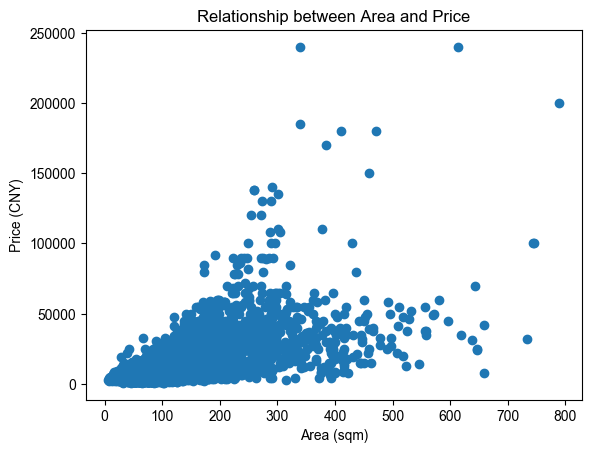

In [19]:
# Plot log_price against area
plt.scatter(residential['area_sqm'], residential['price_float'])
plt.xlabel('Area (sqm)')
plt.ylabel('Price (CNY)')
plt.title('Relationship between Area and Price')
plt.show()


From above chart, we can see that in general the rental price increases as house area increases. 

2. What is the distribution of rental prices? 

<Axes: ylabel='Frequency'>

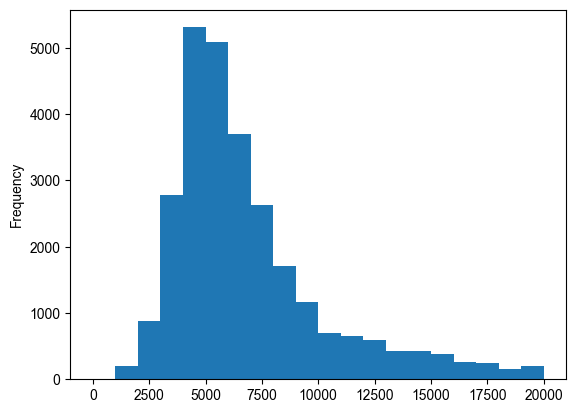

In [20]:
# plot price histogram 
pd.to_numeric(residential["price_float"]).plot.hist(bins=20, range=(1,20000))

We can see majority of the rental listings are between 4000 to 7500 RMB.

####  3. What is the distribution of the area in rental properties? What is the relationship between the area and the rental price per unit area? 

In [21]:
# According to the convention, I split the area of an apartment to several levels

# Define bin edges and labels
bins = [0, 50, 70, 90, 110, 130, 150, float('inf')]
labels = ['<50', '50-70', '70-90', '90-110', '110-130', '130-150', '>=150']

# Use pd.cut() to create area_level column
residential['area_level'] = pd.cut(residential['area_sqm'], bins=bins, labels=labels)

{'110-130': 89.75534667619279, '130-150': 104.11796938066527, '50-70': 100.61670244987643, '70-90': 79.89459001486671, '90-110': 87.34185008530024, '<50': 139.21974954261466, '>=150': 124.15802586677978}


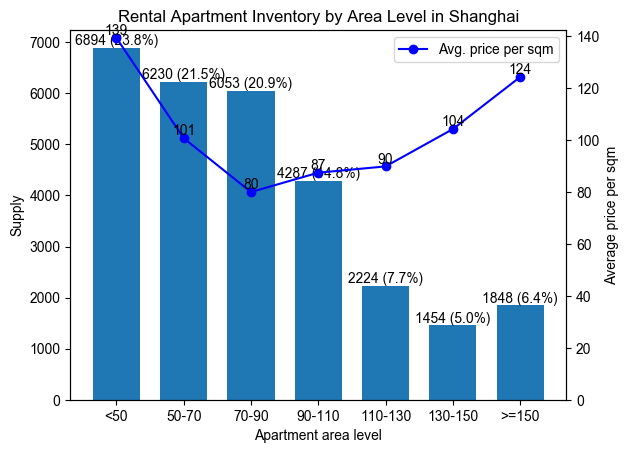

In [22]:
# Create a dictionary to store the average price per square meter for each area level
avg_price_dict = {}
for area_level in residential['area_level'].unique():
    avg_price_dict[area_level] = residential[residential['area_level'] == area_level]['price_per_sqm'].mean()

# Sort the dictionary by the keys (area levels)
avg_price_dict = {k: v for k, v in sorted(avg_price_dict.items(), key=lambda item: item[0])}

print (avg_price_dict)
# Get the x-axis tick locations and labels
xticks = np.arange(len(avg_price_dict))
xlabels = list(avg_price_dict.keys())

# Define the desired order of the x-axis labels
label_order = ['<50', '50-70', '70-90', '90-110', '110-130', '130-150', '>=150']
xlabels = [label for label in label_order if label in xlabels]

# Get the average prices and counts for each area level
avg_prices = [avg_price_dict[label] for label in xlabels]
counts = residential['area_level'].value_counts().loc[xlabels]

# Calculate the percentages
percentages = counts / len(residential) * 100

# Plot the distribution of apartments by area level
fig, ax = plt.subplots()
ax.bar(xticks, counts, align='center', width=0.7)
ax.set_xlabel('Apartment area level')
ax.set_ylabel('Supply')
ax.set_title('Rental Apartment Inventory by Area Level in Shanghai')
ax.set_ylim(bottom=0)

# Add annotations to the bars
for i, count in enumerate(counts):
    ax.annotate(f"{count} ({percentages[i]:.1f}%)", xy=(i, count), ha='center', va='bottom')

# Set the x-axis labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

# Add a secondary y-axis for the average prices
ax2 = ax.twinx()
ax2.plot(xticks, avg_prices, 'bo-', label='Avg. price per sqm')
ax2.set_ylabel('Average price per sqm')
ax2.set_ylim(bottom=0)


# Add annotations to the average price points
for i, price in enumerate(avg_prices):
    ax2.annotate(f"{price:.0f}", xy=(i, price), ha='center', va='bottom')

# Show the legend
ax2.legend()
ax.grid(False)
ax2.grid(False)
plt.show()



From above chart, we can see that:
1. When looking at the residential rental apartment supply by area levels, the most popular rental apartment supply is the apartment that is less than 50 square meters, and then as the area size increases,  the lesser the supply. It is understandable in that in big cities like Shanghai (Tokyo. Hong Kong), the housing price is super high, so small to medium sized apartment are most popular. But there's an exception in the bar chart trend, the rental supplies for 'area>=150' is higher than that of '130-150', it could be that there may be more options for larger living spaces (such as villas or townhouses), which may be preferred by some residents over apartments. This could result in a decline in supply of rental apartment in those areas.
2. As for the variation in price per square meter for different area levels,  originally my expectation is that the larger the area, the lower the unit price will be, it's interesting to see that for the price per meter are high in both ends and dips in the middle. It is also understandable after reflection, the total rental price for smaller apartment are lower, it's mostly young workforce renting houses (most single or young couple), therefore there's more demand for smaller apartment, plus there's more small apartment in the city center, and city center prices are higher, so the rental that is less than 50 are most expensive in unit price. The unit price goes down as area increases, it is pretty intuitive. However, the unit price increases again, after passing 90 square meters, when making an educated guess, it could be because of that the apartment larger than 90 square meters are not mere 'economic' apartment that' just for living any more, it is for quality living, which could include rooms other than just sleeping. And further down the spectrum, for houses that;s larger than 150 square meters, they could be in luxurt.
3. My getaway from reading this chart is that if I were to rent an apartment, I will consider 70-90 which yields fairer unit price. 

4. What is the average rental price per square meter in each district?

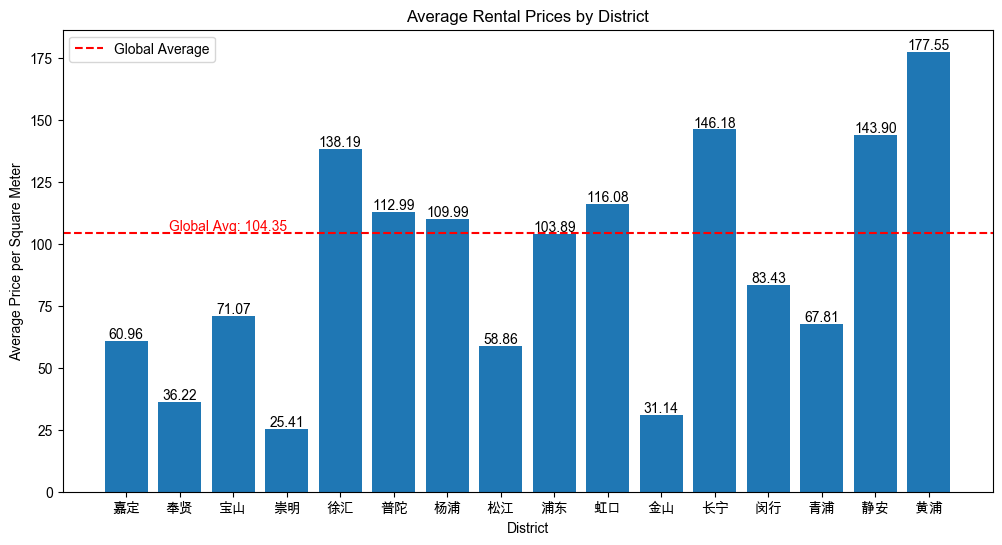

In [23]:
# group by district and calculate average price per square meter
district_price = residential.groupby('district')['price_per_sqm'].mean()

# calculate global average price per square meter
global_avg_price = residential['price_per_sqm'].mean()

# plot bar chart of district average prices with global average line
plt.figure(figsize=(12,6))
plt.bar(district_price.index, district_price.values)
plt.axhline(y=global_avg_price, color='r', linestyle='--', label='Global Average')
plt.xticks(rotation=0, ha='center')  # rotate labels and set horizontal alignment
plt.xlabel('District')
plt.ylabel('Average Price per Square Meter')
plt.title('Average Rental Prices by District')
plt.legend()

# add values to each bar
for i, v in enumerate(district_price.values):
    plt.text(i, v+1, '{:.2f}'.format(v), ha='center')

# add value for global average line
plt.text(len(district_price)*0.05, global_avg_price+1, 'Global Avg: {:.2f}'.format(global_avg_price), color='r')

plt.show()


From the chart, we can see that:
1. Average rental price per sqm in Shanghai is 104.35 RMB/sqm
2. Highest is Huangpu, which is the city center, followed by Changning, Jingan, Xuhui, Hongkou.
3. The lowest 3 is Fenxgxian, Jinshan and Chongming.
In conlusion, the average rental price per sqm is largely related to the proximity to Puxi city center.

###  4. What is the distribution of the number of rental properties in each district? What is the relationship between the number of properties each district and the rental price per unit area?

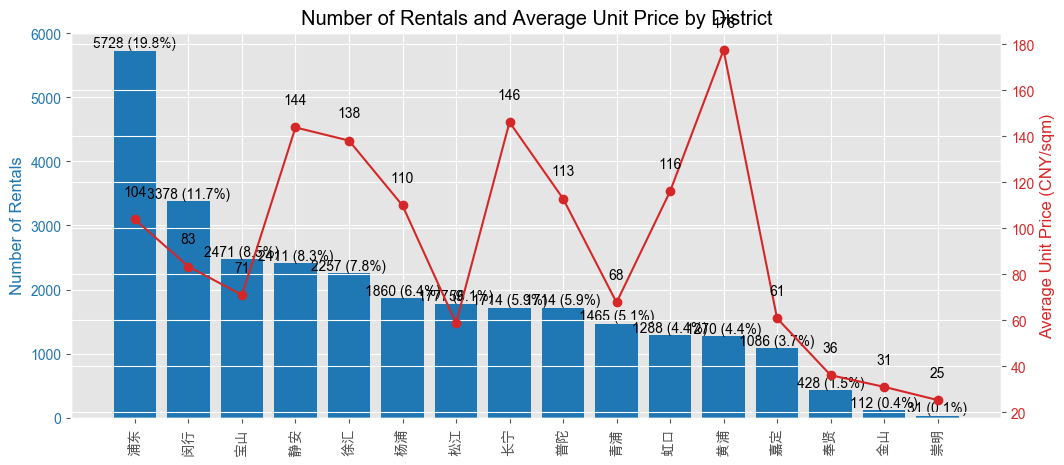

In [24]:
# Calculate the number of rentals and average unit price by district
district_counts = residential['district'].value_counts()
district_prices = residential.groupby('district')['price_per_sqm'].mean()
# Sort the districts by the number of rentals in descending order
sorted_districts = district_counts.sort_values(ascending=False).index

# Plot the number of rentals by district as bars
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.bar(sorted_districts, district_counts[sorted_districts], color='tab:blue')
ax1.set_ylabel('Number of Rentals', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=90)

# Plot the average unit price by district as a line
ax2 = ax1.twinx()
ax2.plot(sorted_districts, district_prices[sorted_districts], 'o-', color='tab:red')
ax2.set_ylabel('Average Unit Price (CNY/sqm)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add text labels for the number of rentals and percentages on top of bars
total_rentals = district_counts.sum()
for i, district in enumerate(sorted_districts):
    count = district_counts[district]
    percent = count / total_rentals * 100
    ax1.text(i, count+50, f'{count} ({percent:.1f}%)', ha='center')
    
# Add text labels for the values of each line dot
for i, price in enumerate(district_prices[sorted_districts]):
    ax2.text(i, price+10, f'{price:.0f}', ha='center')

plt.title('Number of Rentals and Average Unit Price by District')
plt.show()


In [25]:
# Try also plot the number of rental properties of each district on a Map
from pyecharts.charts import Map
from pyecharts import options as opts

# Calculate the number of rentals and average unit price by district
district_counts = residential['district'].value_counts()

district_prices = residential.groupby('district')['price_per_sqm'].mean()

# Modify district names in district_counts variable
district_counts = district_counts.rename(lambda x: x+'新区' if x == '浦东' else x+'区')
# Modify district names in district_prices variable
district_prices = district_prices.rename(lambda x: x+'新区' if x == '浦东' else x+'区')

# Create a Map chart using pyecharts
map_chart = Map()
map_chart.set_global_opts(
    title_opts=opts.TitleOpts(title='Number of Rentals and Average Unit Price by District'),
    tooltip_opts=opts.TooltipOpts(
        formatter='{b}<br/>Number of Rentals: {c}<br/>'
    ),
    legend_opts=opts.LegendOpts(is_show=True)
)
# Add series to the chart for the number of rentals and average unit price by district
map_chart.add(
    series_name='Number of Rentals',
    data_pair=[(district, count) for district, count in district_counts.items()],
    maptype='上海'
)
# Render the chart
map_chart.render_notebook()

From above chart and map, we can see that: 
1. In terms of number of rental properties, it's interesting to see that the order in Histogram is **浦东 >闵行>宝山>静安**>徐汇>杨浦>松江>长宁>普陀>青浦>虹口>黄浦>嘉定>奉贤>金山>崇明.
I'm thinking that maybe the area of the district affects how many available rents are in each district, so I went to check 2022 Shanghai Statistical Year Book, and find the data of each district's area, resident population, population density.   
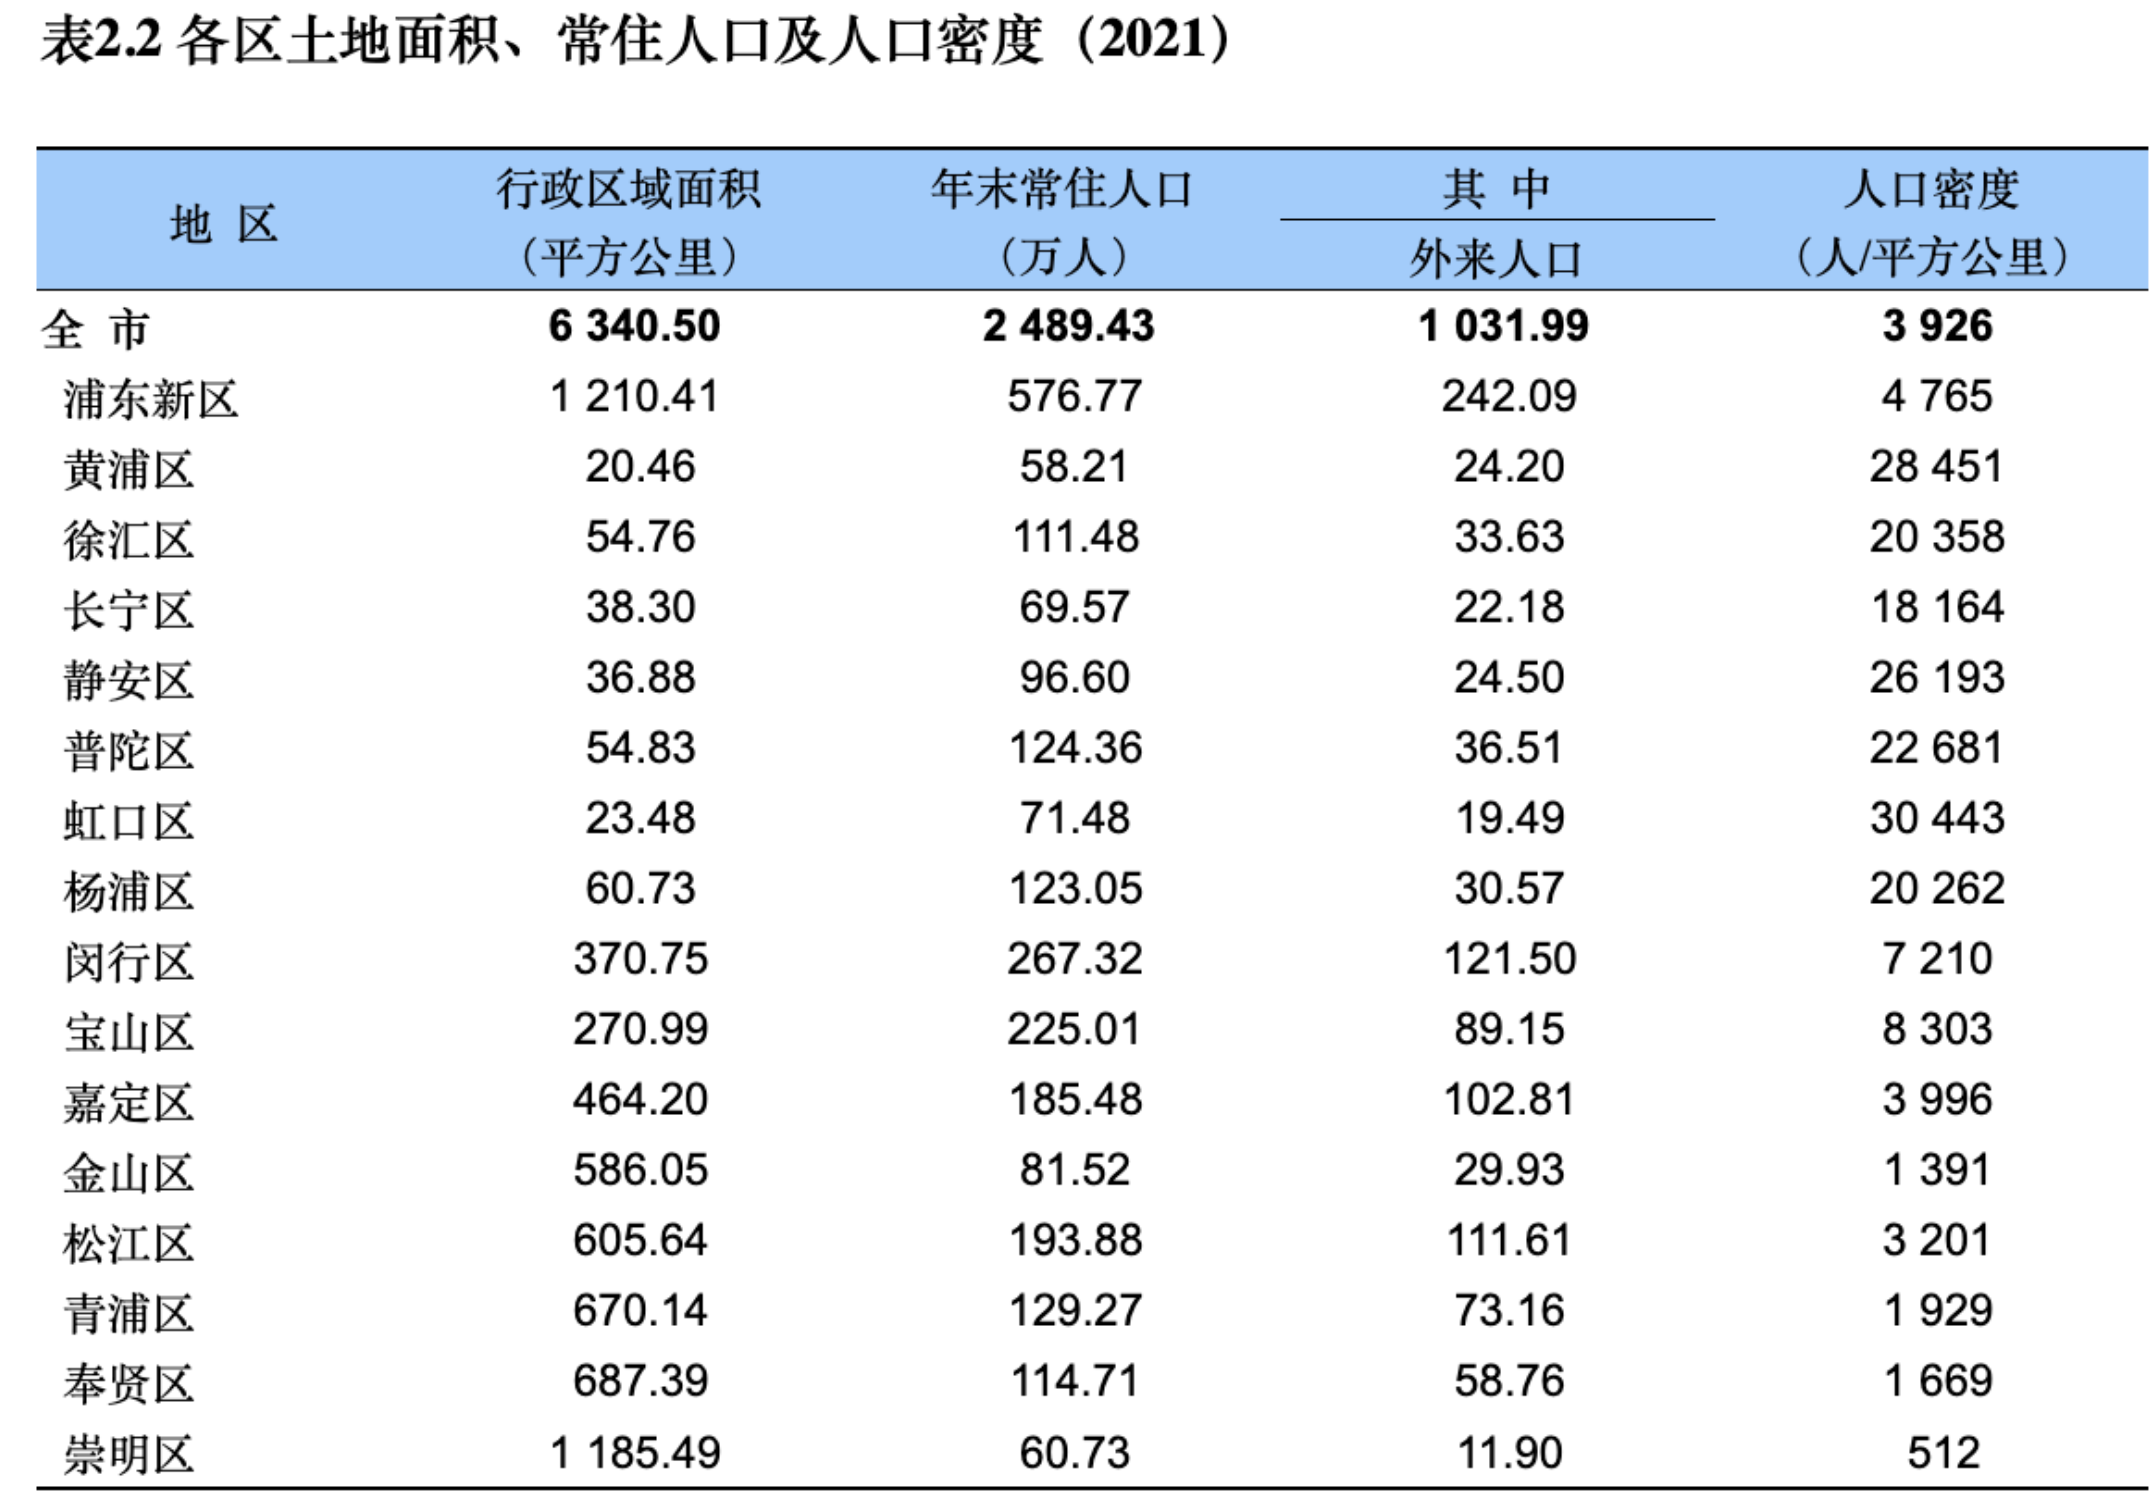

After inspecting the data, I find that the number of rent houses available each district is more related to the resident population of the district than to the area. 

2. In terms of unit price by district, it comes no surprise that **黄浦>长宁>静安>徐汇**>虹口>杨浦>浦东>闵行>宝山>青浦>松江>嘉定>奉贤>金山>崇明
It seems to me that the unit price varies to the distance to the city center , the district that's closer to city center has higher unit price that those are further away. 


5. Which districts and subareas have the highest and lowest rental prices?

In [26]:
# Group the data by district and subarea and calculate the mean rental price
grouped_price= residential.groupby(['district', 'subarea'])['price_float'].mean()

grouped_unit_price = residential.groupby(['district', 'subarea'])['price_per_sqm'].mean()
# Sort the groups by mean rental price in descending order
sorted_grouped = grouped_price.sort_values(ascending=False)
sorted_grouped_unit_price= grouped_unit_price.sort_values(ascending=False)

# Print the top 10 districts and subareas with the highest mean rental prices
print("Top 10 districts and subareas with the highest mean rental prices:")
print(sorted_grouped.head(10))

print("Top 10 districts and subareas with the highest mean unit rental prices:")
print(sorted_grouped_unit_price.head(10))

# Print the top 10 districts and subareas with the lowest mean rental prices
print("\nTop 10 districts and subareas with the lowest mean rental prices:")
print(sorted_grouped.tail(10))

print("\nTop 10 districts and subareas with the lowest mean unit rental prices:")
print(sorted_grouped_unit_price.tail(10))


Top 10 districts and subareas with the highest mean rental prices:
district  subarea
黄浦        黄浦滨江       31309.615385
          新天地        27602.343750
徐汇        徐汇滨江       27578.600000
黄浦        老西门        25551.011364
浦东        联洋         20683.333333
黄浦        豫园         19011.290323
长宁        古北         18573.326667
崇明        崇明其它       18000.000000
杨浦        新江湾城       17447.422680
闵行        金虹桥        17225.480769
Name: price_float, dtype: float64
Top 10 districts and subareas with the highest mean unit rental prices:
district  subarea
黄浦        新天地        228.394492
          淮海中路       213.642515
徐汇        建国西路       208.042614
          衡山路        207.128837
黄浦        黄浦滨江       196.980336
          老西门        195.777227
静安        静安寺        195.615618
徐汇        徐汇滨江       187.905618
静安        南京西路       187.893356
黄浦        南京东路       180.270040
Name: price_per_sqm, dtype: float64

Top 10 districts and subareas with the lowest mean rental prices:
district  subarea
金山        

#### 6. Which subarea has the most apartment supply ? It may be easier to find apartment there as there are more choices.

In [27]:
counts = residential.groupby(['district', 'subarea']).size().reset_index(name='count')
# sort the values by count in descending order
counts = counts.sort_values(by='count', ascending=False)

# print the counts
print(counts.head(10))


    district subarea  count
163       青浦      徐泾    629
46        徐汇     徐家汇    623
142       闵行      华漕    493
132       长宁    中山公园    473
83        松江      泗泾    464
89        浦东      世博    444
34        宝山      顾村    438
172       静安    南京西路    418
173       静安      大宁    400
68        杨浦      中原    361


7. Which apartment complexes or buildings have the highest and lowest rental prices per square meter?


In [28]:
# I also want to know the average price_per_sqm for each compound and see which compound has the highest and lowest price

df_count = residential.groupby(['district', 'subarea', 'compound_name'])['price_per_sqm'].mean().reset_index()
df_count['count'] = residential.groupby(['district', 'subarea', 'compound_name'])['price_per_sqm'].count().values
df_count = df_count.sort_values(by='price_per_sqm', ascending=False).reset_index(drop=True)

print(df_count.head(10))

print(df_count.tail(10))


  district subarea compound_name  price_per_sqm  count
0       徐汇     衡山路        高安路55号     673.042862      1
1       黄浦    淮海中路        长乐路47弄     541.401274      1
2       黄浦     新天地        翠湖天地五期     511.285836      5
3       长宁    中山公园          兴安小区     484.326252      1
4       闵行     金虹桥          古北壹号     481.298014      4
5       静安    南京西路         郑家巷小区     480.000000      1
6       长宁     镇宁路            兰庭     477.011705      1
7       徐汇     衡山路       高安路103号     476.190476      1
8       徐汇    建国西路      襄阳南路389弄     451.943356      1
9       黄浦    黄浦滨江       融创外滩壹号院     449.003557      1
     district subarea  compound_name  price_per_sqm  count
8091       崇明     陈家镇  裕鸿佳苑(裕国路328弄)      14.001263      2
8092       崇明    崇明新城           风清雅苑      13.644264      2
8093       奉贤      海湾         棕榈滩海景城      13.008976      1
8094       浦东     万祥镇          万祥兴隆苑      12.420432      1
8095       奉贤      海湾          嘉业海悦苑      11.704618      1
8096       青浦     朱家角            嘉涛湾     

8. What is the most common type of apartment layout (number of bedrooms, bathrooms, etc.) overall , and in each district?

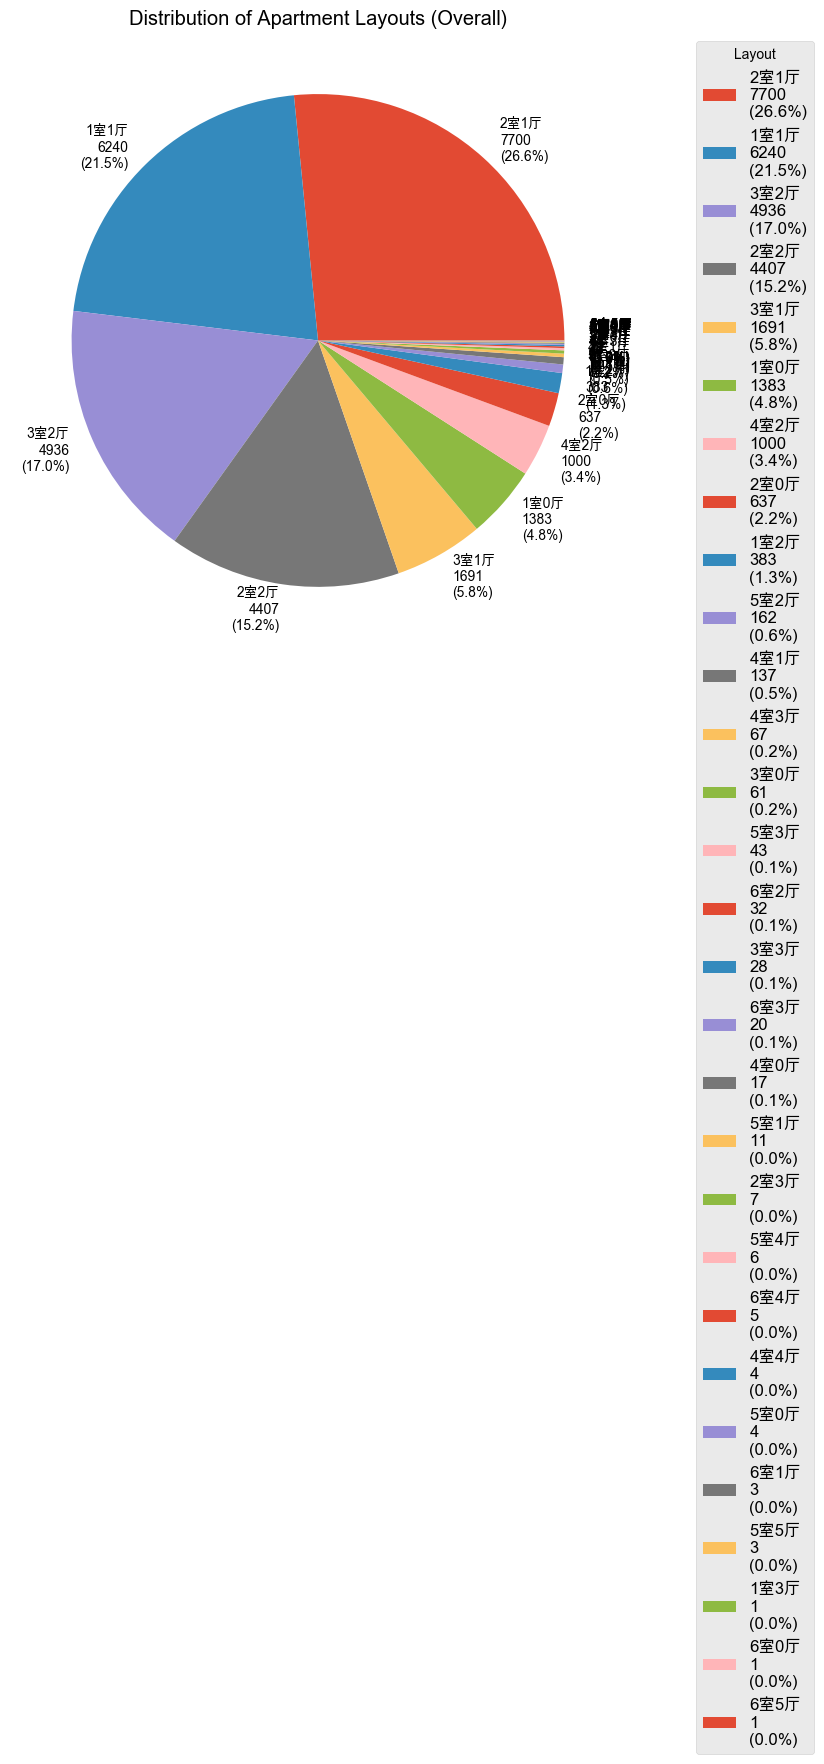

In [29]:

# create a new column 'bed_liv_room' based on the 'layout' column
if 'bed_liv_room' not in residential.columns:
    residential['bed_liv_room'] = residential['layout'].str.extract(r'(\d+室\d+厅)')

# get the overall count and percentage of apartment layouts
overall_counts = residential['bed_liv_room'].value_counts()
overall_percentages = 100 * overall_counts / len(residential)

# plot pie chart for overall distribution
total = overall_counts.sum()
labels = [f"{label}\n{count}\n({100 * count/total:.1f}%)" for label, count in zip(overall_counts.index, overall_counts)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(overall_counts, labels=labels, autopct='')
ax.set_title('Distribution of Apartment Layouts (Overall)')

# set legend and adjust font size
legend = plt.legend(title='Layout', bbox_to_anchor=(1.1, 1), loc='upper left', fontsize='12')
plt.setp(legend.get_texts(), fontsize='12')
plt.show()


We can see that the 10 most popular rental apartment layout in the rent market are:

| Bed_Liv_Room | Percentage (%) |
| --- | ---: |
| 2室1厅 | 26.560883 |
| 1室1厅 | 21.524664 |
| 3室2厅 | 17.026561 |
| 2室2厅 | 15.201794 |
| 3室1厅 | 5.833046 |
| 1室0厅 | 4.770611 |
| 4室2厅 | 3.449465 |
| 2室0厅 | 2.197309 |
| 1室2厅 | 1.321145 |
| 5室2厅 | 0.558813 |



It is pretty understandable that in metropolitan city like Shanghai, due to the limited land resources and increasing population density, most houses are designed in medium and small sizes. 

For the top one ,2室1厅, 2 bedroom 1 living room , suitable for medium-sized families  
For the 2nd one, 1室1厅, 2 bedroom 1 living room, suitable for single individuals, young couples, and small families  
For the 3rd one, 3室2厅, 3 bedroom 2 living room, suitable for larger families or people with more demand for space  

Additionally, according to a report by E-house China R&D Institute, one-bedroom and two-bedroom apartments accounted for around 70% of the total new residential supply in Shanghai in 2020, while three-bedroom apartments accounted for around 20%.

I'm curious to see what't the most popular rental apartment layout in each district

In [30]:
# Group by district, and find the mode of layout type
mode_df = residential.groupby(['district'])[['room_count', 'hall_count']].agg(lambda x: x.mode()[0])

# Print the result
print(mode_df)


          room_count  hall_count
district                        
嘉定                 2           2
奉贤                 3           2
宝山                 2           1
崇明                 3           2
徐汇                 2           1
普陀                 2           1
杨浦                 2           1
松江                 3           2
浦东                 2           1
虹口                 2           1
金山                 3           2
长宁                 1           1
闵行                 2           1
青浦                 3           2
静安                 1           1
黄浦                 1           1


From above, I can see that the distrcit that's closer to city center have less bedrooms (usually 1b1r ) than those are further away from city center. It is pretty understandable as there are more mordern new buildings built in  remote area with larger area. 

#### 9. Is there noticeable difference in price per square meters rental price for those who has description and those doesn't have ?

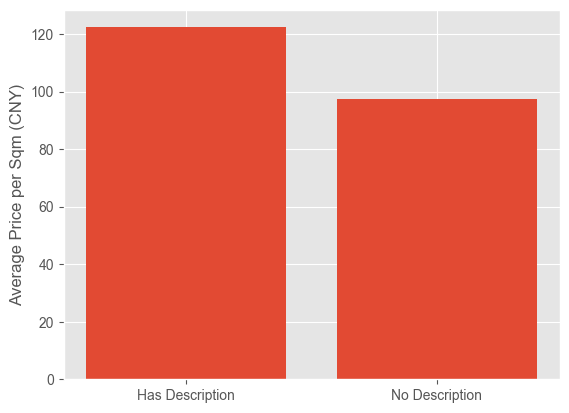

In [31]:
# Create subsets of the data with non-null and null house_description values
has_description = residential[residential['house_desc'].notnull()]
no_description = residential[residential['house_desc'].isnull()]

# Calculate the average price for each subset
has_desc_avg_price = has_description['price_per_sqm'].mean()
no_desc_avg_price = no_description['price_per_sqm'].mean()

# Plot the average prices for each subset
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(['Has Description', 'No Description'], [has_desc_avg_price, no_desc_avg_price])
ax.set_ylabel('Average Price per Sqm (CNY)')
plt.show()


From above chart, we can see that rental listings that have descriptions has noticeable higher price than those that don't have. 
It might be that the rental listings with description filled are apartment that has highlight in its amenity, decorations, etc so it is filled with ample information,  and they are likely be actively maintained by agent/landlord to fill in details of the listings, therefore they are more expensive. 

#### 10. What are some valuable insights we can draw some making a word cloud of all rental listings' description field?

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/88/vr6t1yr91fzgflwqw8v24px00000gn/T/jieba.cache
Loading model cost 1.047 seconds.
Prefix dict has been built successfully.


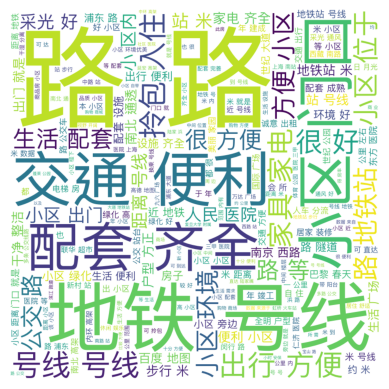

In [32]:
import jieba
from wordcloud import WordCloud
import re

# Filter out rows where the house_desc is null
residential = residential[residential['house_desc'].notnull()]

# Define custom stop words
stop_words = [' ', '的', '了', '和', '是', '在', '有', '中', '为', '以', '及', '上', '下']

# Use jieba to segment the text and join the words together
text = ' '.join(jieba.cut(''.join(residential['house_desc']), cut_all=False, HMM=True))

# Remove words inside brackets 【】 using regular expression
text = re.sub('\【.*\】', '', text)
# Define a Chinese font
font_path = '/System/Library/Fonts/PingFang.ttc'
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', font_path=font_path, stopwords=stop_words).generate(text)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


From above word cloud, I can see that “交通便利” “地铁” “配套齐全” “拎包入住” are the most frequent mentioned words. It indicates that landlord like to use 'Close to Metro', 'fully equipped and furnished' to attract tenants.

 11. How does the price per square meter vary based on the number of bedrooms or bathrooms in the apartment?

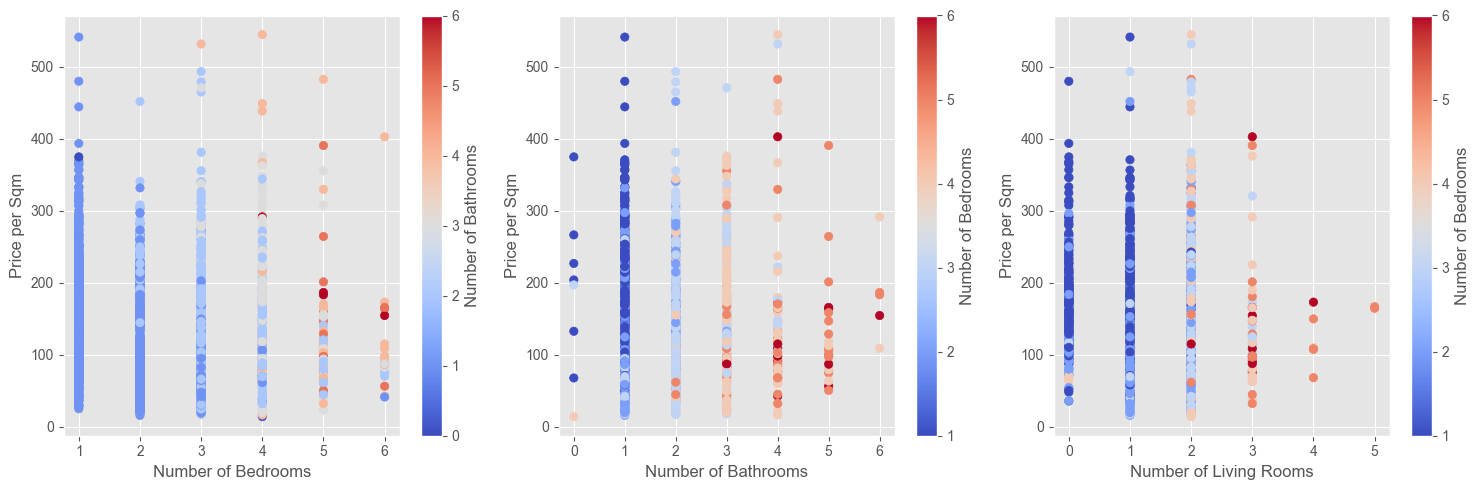

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))

# create a scatter plot for number of bedrooms vs. price per sqm
scatter1 = ax1.scatter(residential['room_count'], residential['price_per_sqm'], c=residential['toilet_count'], cmap='coolwarm')
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Price per Sqm')
fig.colorbar(scatter1, ax=ax1, label='Number of Bathrooms')

# create a scatter plot for number of bathrooms vs. price per sqm
scatter2 = ax2.scatter(residential['toilet_count'], residential['price_per_sqm'], c=residential['room_count'], cmap='coolwarm')
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Price per Sqm')
fig.colorbar(scatter2, ax=ax2, label='Number of Bedrooms')

# create a scatter plot for number of living rooms vs. price per sqm
scatter3 = ax3.scatter(residential['hall_count'], residential['price_per_sqm'], c=residential['room_count'], cmap='coolwarm')
ax3.set_xlabel('Number of Living Rooms')
ax3.set_ylabel('Price per Sqm')
fig.colorbar(scatter3, ax=ax3, label='Number of Bedrooms')

plt.tight_layout()
plt.show()


From the chart, we can see that ：
1. There are positive correlation between number of bedroom, number of bathrooms and number og lviing rooms
2. There are not obvious relationship between number of room with the price per sqm. 

#### 12. Is there a correlation between the apartment's proximity to a metro station and its rental price?

To calculate the correlation, we have the rental price in residential dataframe, another data we need to obtain is the distance between the house and the cloest metro station, now we have the longtitude and latitude of the house position. To calculate the distance, we need to get a table of all metro stations in shanghai and their longtitude and lattitude.

I have obtained the data from the internet and format and saved them to a table called `sh_metro_stations`. Let's load the data first.

In [34]:
# Use a context manager to handle the SQLite connection and cursor
with sqlite3.connect('./db/house_rent_lianjia.db') as conn:
    # Query the database and convert the data to a Pandas DataFrame
    stations = pd.read_sql_query("SELECT * FROM sh_metro_stations", conn)

# Have an overview of the data
print(stations)

      id  name         lng        lat           lines
0      1    莘庄  121.385373  31.111152        5号线, 1号线
1      2   外环路  121.393020  31.120899             1号线
2      3   莲花路  121.402910  31.130900             1号线
3      4  锦江乐园  121.414107  31.142217             1号线
4      5  上海南站  121.430041  31.154579  3号线, 15号线, 1号线
..   ...   ...         ...        ...             ...
579  580  三鲁公路  121.527389  31.056108             浦江线
580  581   闵瑞路  121.530323  31.047956             浦江线
581  582   浦航路  121.530591  31.040993             浦江线
582  583  东城一路  121.532093  31.030390             浦江线
583  584   汇臻路  121.524558  31.025245             浦江线

[584 rows x 5 columns]


First I will examine the correlation between apartment's distance to closest metro staion and rental price.  
To further investigate how metro stations nearby will affect the rental price of a house, I also want to investigate if number of metro stations within 1km of the house will be a more significant factor in determining rental price.


In [35]:
from scipy.spatial import KDTree

# convert latitudes and longitudes to radians
residential_rad = np.radians(residential[['latitude', 'longitude']].values)
metro_coords_rad = np.radians(np.array([(s.lat, s.lng) for s in stations.itertuples()]))

# build a KDTree from the metro coordinates
metro_tree = KDTree(metro_coords_rad)

# query the KDTree to find the nearest metro station for each residential property
distances, indices = metro_tree.query(residential_rad, k=1)

# calculate the distance to the nearest metro station for each residential property
residential['dist_to_metro'] = distances * 6371

# find the metro stations within a 1km radius of each residential property
within_radius = metro_tree.query_ball_point(residential_rad, r=1/6371)

# count the number of metro stations within a 1km radius for each residential property
residential['num_metro_stations_in_1km'] = [len(x) for x in within_radius]

cor_dis_metro= residential['dist_to_metro'].corr(residential['price_float'])
print('Correlation between distance to nearest metro station and rental price: {:.2f}'.format(cor_dis_metro))

# calculate the correlation between the number of metro stations within a 1km radius and the rental price
cor_num_metro= residential['num_metro_stations_in_1km'].corr(residential['price_float'])
print('Correlation between number of metro stations within 1km radius and rental price: {:.2f}'.format(cor_num_metro))


Correlation between distance to nearest metro station and rental price: -0.08
Correlation between number of metro stations within 1km radius and rental price: 0.15


The calculated Correlation between distance to nearest metro station and rental rice: -0.08.
It indicates a weak negative correlation between distance to nearest metro station and rental price. This means that as the distance to the nearest metro station increases, there is a slight decrease in rental price, but the relationship is not very strong. Other factors likely play a more significant role in determining rental prices.

The correlation coefficient of 0.15 suggests a weak positive correlation between the number of metro stations within a 1km radius and the rental price. This means that as the number of metro stations within 1km of the house increases, the rental price tends to increase slightly. However, the correlation is not very strong, so there are likely other factors that also influence the rental price.

#### 13. Are there certain features or amenities (such as parking or an elevator) that tend to be associated with higher rental prices?

I want to calcualte cooreation of all numerical variables with rental price to get a correlation matrix. That will make it easy to identify which variables affects rental price more. 

First, I will add a column to store the apartment distance to the city center, as I believe it will be a factor that affects rental price.    
Also, I will perform one-hot encoding on selected categorical variables so the correaltion between them and the rental price can be calcualted.   


In [36]:
from math import radians, sin, cos, sqrt, atan2

# Coordinates of People's Square, which is commonly considered city center
ppl_sq_lat = 31.2304
ppl_sq_lon = 121.4737

# Haversine formula to calculate distance between two sets of coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km

    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the difference between the two latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

# Create a new column in the DataFrame with the distance to People's Square
residential['distance_to_ppl_sq'] = residential.apply(
    lambda row: haversine(row['latitude'], row['longitude'], ppl_sq_lat, ppl_sq_lon), axis=1)


In [37]:
one_hot_cols = ['has_elevator', 'decoration', 'floor_sec']
residential_one_hot = pd.get_dummies(residential, columns=one_hot_cols)


In [38]:
residential_one_hot_int = residential_one_hot.copy()
for col in residential_one_hot.columns:
    if residential_one_hot[col].dtype == 'bool':
        residential_one_hot_int[col] = residential_one_hot[col].astype('int')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
residential_one_hot_numeric = residential_one_hot_int.select_dtypes(include=numerics)

# Calculate correlation:
correlations = residential_one_hot_numeric.corr()['price_float'].sort_values(ascending=False)
print(correlations)



price_float                  1.000000
area_sqm                     0.733362
toilet_count                 0.679574
room_count                   0.521042
price_per_sqm                0.519113
hall_count                   0.450574
floor_num_int                0.369536
has_elevator_有               0.302203
decoration_ 精装修              0.236645
num_metro_stations_in_1km    0.151494
num_metro_stations           0.138966
floor_sec_低楼层                0.101565
latitude                     0.064726
facilities_count             0.057847
floor_sec_中楼层               -0.022275
floor_sec_高楼层               -0.073612
longitude                   -0.073960
dist_to_metro               -0.081856
distance_to_ppl_sq          -0.212258
has_elevator_无              -0.302203
Name: price_float, dtype: float64


This is a correlation table showing the correlation coefficient between the rental price and numerical variables. The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation (the two variables move in the same direction), 0 indicates no correlation, and -1 indicates a perfect negative correlation (the two variables move in opposite directions).

We will use a commonly used rule of thumb here:

0.1 < |r| < 0.3: weak correlation  
0.3 < |r| < 0.5: moderate correlation  
|r| > 0.5: strong correlation  

For example, the variable with the highest positive correlation with the rental price is `area_sqm`, with a correlation coefficient of `0.733362`. This suggests that there is a strong positive linear relationship between area size and the rental price itself. The next highest positive correlation is with the `toilet_count` and `room_count`variable, indicating that apartments has more toilets and rooms tend to have higher rental prices.

`hall_count`, `floor_num_int` `has_elevator_有` have moederate correaltion with rental price. 
`decoration_ 精装修`,`num_metro_stations`,`floor_sec_低楼层` has weak correlation with rental price.

On the other hand, variables such as `has_elevator_无` (no elevator) and `dist_to_metro` have negative correlation coefficients, suggesting that these features are negatively impacting the rental price. 

`has_elevator_无`  has moderate negative correaltion with rental price, it means that if an aparment doesn't have an elevator, it may considerably decrease the rental price.
`distance_to_ppl_sq` has weak negative correlation with rental price, the further away the apartment if from city center, the price drops, but the effect is not as obvious as other variables.  

14. How do apartment prices vary based on the floor the apartment is on (higher or lower floors)?


<Axes: xlabel='floor_sec', ylabel='price_float'>

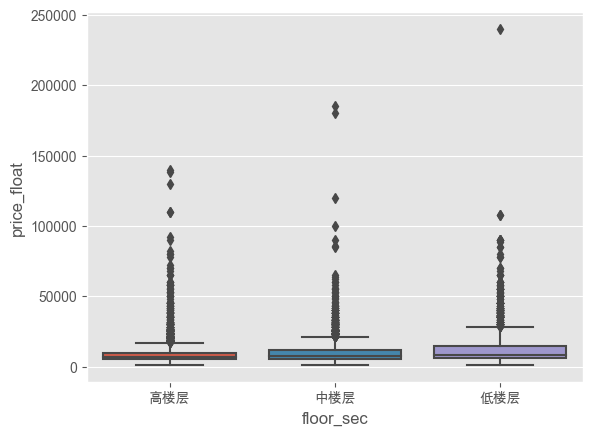

In [39]:
import seaborn as sns

sns.boxplot(x='floor_sec', y='price_float', data=residential)

The resulting plot is a box plot that shows the distribution of apartment prices for each floor section. The x-axis represents the floor section, and the y-axis represents the apartment prices. The boxes in the plot show the interquartile range (IQR), with the horizontal line inside the box representing the median. The whiskers extend to the minimum and maximum values that fall within 1.5 times the IQR from the box. Any outliers beyond the whiskers are shown as individual points.

From the plot, it appears that apartments on the middle floor section tend to have higher prices than those on the low or high floor sections. The low and high floor sections have similar price ranges and median prices, but the low floor section has more outliers with higher prices. Overall, the floor section appears to be a factor that influences apartment prices, with apartments on the middle floor section generally being more expensive.

15. Can we build a model to predict the rental price of an apartment given its features, such as location, size, number of rooms, etc.?

In [40]:
# Connect to the database
conn = sqlite3.connect('./db/house_sell_lianjia.db')

# Create a cursor object
c = conn.cursor()

# Query the database and fetch all the data from a table
c.execute("SELECT 小区 FROM unique_zhuzhai_xiaoqu")
xiaoqus = [row[0] for row in c.fetchall()]
print(len(xiaoqus))
# Close the database connection
conn.close()

9686


In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the features and target variable
features = ['area_sqm', 'room_count', 'hall_count','toilet_count', 'floor_num_int','has_elevator_有', 'has_elevator_无','num_metro_stations_in_1km']
target = 'price_float'

# Create new features
print('distance_to_ppl_sq'.shape)
apartments = residential_one_hot[residential_one_hot['area_sqm'] <= 150]
apartments = apartments[apartments['compound_name'].isin(xiaoqus)]
# Select only relevant features
residential_selected = apartments[features + [target]]
residential_selected.fillna(0, inplace=True)
print(residential_selected.shape)
print("Number of NaN values:\n", residential_selected.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(residential_selected[features], residential_selected[target], test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear regression mean squared error: ", mse)

# Try a random forest model
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Evaluate the random forest model on the testing data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random forest mean squared error: ", mse)


(8017, 38)
(6556, 9)
Number of NaN values:
 area_sqm                     0
room_count                   0
hall_count                   0
toilet_count                 0
floor_num_int                0
has_elevator_有               0
has_elevator_无               0
num_metro_stations_in_1km    0
price_float                  0
dtype: int64
Linear regression mean squared error:  10367491.176970748


/var/folders/88/vr6t1yr91fzgflwqw8v24px00000gn/T/ipykernel_654/1174606612.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_selected.fillna(0, inplace=True)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Random forest mean squared error:  8544132.964368677


On average, the Random Forest model's predictions deviate from the actual values less than those of the linear regression model. Therefore, the Random Forest model performs better on your dataset according to this metric.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


Mean squared error:  7966008.70035251


The mean squared error (MSE) is a measure of the quality of an estimator or a model — it is always non-negative, and values closer to zero are better.

In your case, the MSE for the Gradient Boosting Regressor model is approximately 7,966,009, which is less than the MSEs for both the Linear Regression model and the Random Forest model that you provided earlier. This suggests that the Gradient Boosting Regressor model performs better on your dataset according to this metric, meaning it is predicting the target variable more accurately.

Remember, MSE is just one of many metrics used to evaluate model performance. Depending on the context of the problem and the specific characteristics of the data, other metrics may be more appropriate. Additionally, while a lower MSE indicates a better fit to the data, it's essential to ensure the model is not overfitting, i.e., it's not too complex and generalizes well to unseen data.

16. Can we use neural networks to predict the rental price of an apartment given its features, and compare the performance of this model with other machine learning models?

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(residential_selected[features], residential_selected[target], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = mean_squared_error(y_test, model.predict(X_test_scaled))
print("Neural network mean squared error: ", mse)


2023-05-31 12:20:48.911108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
132/132 [==============================] - 1s 4ms/step - loss: 99587776.0000 - val_loss: 96459168.0000
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 93169448.0000 - val_loss: 82665296.0000
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 70784800.0000 - val_loss: 51921488.0000
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 38659988.0000 - val_loss: 22789954.0000
Epoch 5/100
132/132 [==============================] - 0s 2ms/step - loss: 18669404.0000 - val_loss: 13316216.0000
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 13637631.0000 - val_loss: 11871636.0000
Epoch 7/100
132/132 [==============================] - 1s 5ms/step - loss: 12408411.0000 - val_loss: 11092981.0000
Epoch 8/100
132/132 [==============================] - 0s 3ms/step - loss: 11638363.0000 - val_loss: 10435486.0000
Epoch 9/100
132/132 [==============================] - 0s 3ms/step - loss: 11051

The result you posted shows that the MSE for the Neural Network model is approximately 8,088,941. This is a slightly higher value than the MSE for the Gradient Boosting Regressor (which was approximately 7,966,009), but it's lower than the MSEs for both the Linear Regression and Random Forest models.

So, based on the MSE values, the Gradient Boosting Regressor model appears to perform best on your dataset, closely followed by the Neural Network model. Remember, though, that these results are specific to the current configurations of your models. Tuning hyperparameters, preprocessing the data differently, or even changing the model's architecture could potentially improve these results.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the data
apartment_data = pd.read_csv('apartment_data.csv')

# Drop rows with missing values in the target variable
apartment_data.dropna(subset=['rent_price'], inplace=True)

# Select the relevant features
residential_selected = apartment_data[['location', 'size_sqft', 'bedrooms', 'bathrooms', 'building_age_yrs', 'has_parking', 'floor']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(residential_selected, apartment_data['rent_price'], test_size=0.2, random_state=0)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the features to preprocess separately
numerical_features = ['size_sqft', 'building_age_yrs', 'floor']
categorical_features = ['location']

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linearregression', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean squared error: ', mse)


FileNotFoundError: [Errno 2] No such file or directory: 'apartment_data.csv'

6. Can we use anomaly detection algorithms to identify apartments that have unusually high or low rental prices, and investigate the reasons for these anomalies?

In [45]:
residential_one_hot.columns

Index(['link', 'house_code', 'district', 'subarea', 'compound_name', 'metro',
       'orientation', 'has_parking', 'water_type', 'electricity_type', 'gas',
       'heating', 'house_tags', 'facilities', 'house_desc', 'room_count',
       'hall_count', 'toilet_count', 'area_sqm', 'price_float', 'layout',
       'num_metro_stations', 'floor_num_int', 'longitude', 'latitude',
       'facilities_count', 'price_per_sqm', 'area_level', 'bed_liv_room',
       'dist_to_metro', 'num_metro_stations_in_1km', 'distance_to_ppl_sq',
       'has_elevator_无', 'has_elevator_有', 'decoration_ 精装修', 'floor_sec_中楼层',
       'floor_sec_低楼层', 'floor_sec_高楼层'],
      dtype='object')

In [47]:
from sklearn.ensemble import IsolationForest

# Load data
data = residential_one_hot

# Extract the feature columns and standardize the data
X = data[['room_count', 'hall_count', 'toilet_count', 'area_sqm','num_metro_stations','floor_num_int','dist_to_metro', 'has_elevator_有', 'has_elevator_无', 'decoration_ 精装修', 'floor_sec_低楼层', 'floor_sec_中楼层', 'floor_sec_高楼层', 'num_metro_stations_in_1km', 'distance_to_ppl_sq']]
X['num_metro_stations_in_1km'].fillna(0, inplace=True)

X = (X - X.mean()) / X.std()

# Train the isolation forest model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.05), random_state=42)
model.fit(X)

# Predict the anomalies
anomaly_scores = model.decision_function(X)
anomaly_labels = model.predict(X)

# Add the anomaly scores and labels to the original data
data['anomaly_score'] = anomaly_scores
data['anomaly_label'] = anomaly_labels

# Print the anomalies
anomalies = data[data['anomaly_label'] == -1]
print(anomalies)


/var/folders/88/vr6t1yr91fzgflwqw8v24px00000gn/T/ipykernel_654/3293664292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_metro_stations_in_1km'].fillna(0, inplace=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


                                                    link   
406    http://sh.lianjia.com/zufang/SH172259698249878...  \
678    http://sh.lianjia.com/zufang/SH168518592884847...   
870    http://sh.lianjia.com/zufang/SH173957235123578...   
938    http://sh.lianjia.com/zufang/SH169424314798021...   
1045   http://sh.lianjia.com/zufang/SH170761954312532...   
...                                                  ...   
31050  http://sh.lianjia.com/zufang/SH286109143243161...   
31056  http://sh.lianjia.com/zufang/SH286958962916485...   
31062  http://sh.lianjia.com/zufang/SH288776122200124...   
31066  http://sh.lianjia.com/zufang/SH289693882260652...   
31067  http://sh.lianjia.com/zufang/SH289933818567694...   

                  house_code district subarea compound_name   
406    SH1722596982498787328       静安    西藏北路       万科翡翠雅宾利  \
678    SH1685185928848474112       静安    西藏北路        中粮天悦壹号   
870    SH1739572351235784704       静安    南京西路     北京西路1094弄   
938    SH169424314798021017